In [ ]:
Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants 
around the world. It centralizes power plant data to make it easier to navigate, compare 
and draw insights for one’s own analysis. The database covers approximately 14,000 power 
plants from 3 countries(USA, AUS, INDIA) and includes thermal plants 
(e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). 
Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. 
It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
    
Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas methods to combine all the datasets and then start working on this project.


In [8]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#loading Australia dataframe and naming it 
df1=pd.read_csv(r"C:\Users\bee\Desktop\Data set\database_AUS.csv")

In [10]:
#loading USA dataframe and naming it
df2=pd.read_csv(r"C:\Users\bee\Desktop\Data set\database_USA.csv")

In [11]:
#loading Indian dataframe and naming it
df3=pd.read_csv(r"C:\Users\bee\Desktop\Data set\database_IND.csv")

In [12]:
#printing first five records of each dataframe to view and compare columns
df1.head()


country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel  other_fuel1  other_fuel2  ...  \
0  -34.9387   138.5377        Solar          NaN          NaN  ...   
1  -34.9453   138.5882        Solar          NaN          NaN  ...   
2  -35.0641   117.7977         Wind          NaN          NaN  ...   
3  -23.7966   133.8971        Solar          NaN          NaN  ...   
4  -34.5509   138.7659          Oil          NaN          NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                 2019.0                  NaN                 NaN   
1                 2019.0                  NaN                 NaN   
2                 2019.0            89.595278          102.642778   
3                 2019.0                  NaN                 NaN   
4                 2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2           96.555556           95.872778           85.900278   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019            generation_data_source  \
0                  NaN                  NaN                               NaN   
1                  NaN                  NaN                               NaN   
2            92.682222                  NaN  Australia Clean Energy Regulator   
3                  NaN                  NaN                               NaN   
4                  NaN                  NaN                               NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [13]:
df2.head()


country              country_long                            name  \
0     USA  United States of America  10 Briggs Solar NG  LLC (East)   
1     USA  United States of America      100 Brook Hill Drive Solar   
2     USA  United States of America      1001 Ebenezer Church Solar   
3     USA  United States of America             1008 Matthews Solar   
4     USA  United States of America               1009 Yadkin Solar   

    gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  USA0062781          0.0   41.6327   -71.4963          NaN         NaN   
1  USA0063292          2.0   41.0930   -73.9828        Solar         NaN   
2  USA0063444          0.0   36.2838   -80.8434          NaN         NaN   
3  USA0063447          0.0   36.2167   -80.5525          NaN         NaN   
4  USA0063445          0.0   36.1475   -80.6561          NaN         NaN   

  other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0         NaN  ...                2019.0                  NaN   
1         NaN  ...                2019.0                  NaN   
2         NaN  ...                2019.0                  NaN   
3         NaN  ...                2019.0                  NaN   
4         NaN  ...                2019.0                  NaN   

  generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                2.467   
2                 NaN                  NaN                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

                   generation_data_source  estimated_generation_gwh  
0                                     NaN                       NaN  
1  U.S. Energy Information Administration                       NaN  
2                                     NaN                       NaN  
3                                     NaN                       NaN  
4                                     NaN                       NaN  

[5 rows x 27 columns]

In [14]:
df3.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0              2.41461          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [15]:
#printing last five records of each dataframe to view and compare columns
df1.tail()

country country_long                                 name   gppd_idnr  \
507     AUS    Australia                           Yarrawonga  AUS0000101   
508     AUS    Australia                               Yarwun  AUS0000173   
509     AUS    Australia                             Yuendumu  AUS0000465   
510     AUS    Australia                               Yulara  AUS0000257   
511     AUS    Australia  Yurralyi Maya (Karratha Seven Mile)  AUS0000218   

     capacity_mw  latitude  longitude primary_fuel  other_fuel1  other_fuel2  \
507         9.00  -36.0094   145.9995        Hydro          NaN          NaN   
508       154.00  -23.8306   151.1519          Gas          NaN          NaN   
509         0.24  -22.2426   131.7931        Solar          NaN          NaN   
510        10.95  -25.2323   130.9912          Gas          NaN          NaN   
511       180.00  -20.7620   116.7420          Gas          NaN          NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
507  ...                 2019.0            38.216111           44.224722   
508  ...                 2019.0                  NaN                 NaN   
509  ...                 2019.0                  NaN                 NaN   
510  ...                 2019.0            21.947500           22.775000   
511  ...                 2019.0                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
507           50.183889           46.035278           31.444722   
508                 NaN                 NaN                 NaN   
509                 NaN            5.216667            5.176944   
510           24.086111           23.043889           19.885000   
511          977.226944          945.557778          756.219167   

     generation_gwh_2018  generation_gwh_2019  \
507            37.317778                  NaN   
508                  NaN                  NaN   
509             5.341111                  NaN   
510            19.558056                  NaN   
511           597.411667                  NaN   

               generation_data_source  estimated_generation_gwh  
507  Australia Clean Energy Regulator                       NaN  
508                               NaN                       NaN  
509  Australia Clean Energy Regulator                       NaN  
510  Australia Clean Energy Regulator                       NaN  
511  Australia Clean Energy Regulator                       NaN  

[5 rows x 27 columns]

In [16]:
df2.tail()

country              country_long                           name  \
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
11874         NaN  ...                2019.0                3.671   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0                0.000   
11878         NaN  ...                2019.0               12.968   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
11874             2.46015               2.489               1.670   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877             0.00000               0.000                 NaN   
11878            51.27600              71.505              76.392   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
11874             1.23349                2.630              1.21100   
11875                 NaN                1.161              1.58900   
11876                 NaN                  NaN                  NaN   
11877                 NaN                  NaN                  NaN   
11878            76.63100               75.228             72.06506   

                       generation_data_source  estimated_generation_gwh  
11874  U.S. Energy Information Administration                       NaN  
11875  U.S. Energy Information Administration                       NaN  
11876                                     NaN                       NaN  
11877  U.S. Energy Information Administration                       NaN  
11878  U.S. Energy Information Administration                       NaN  

[5 rows x 27 columns]

In [17]:
df3.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                1.925                 NaN   
904  ...                    NaN                2.054                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [18]:
#printing a list of columns to have a clear view of columns in each dataframe
#this will give me an opportunity to compare the columns and determined which pandas method I can apply to combine them.
df1.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [19]:
df2.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [20]:
df3.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [21]:
#I confirm that all columns are the same accross all the dataframes therefore will combine them using the concat method

Dataframes = [df1, df2, df3]
df=pd.concat(Dataframes)

In [22]:
#printing the combined DataFrame and naming it df
df

country country_long                          name   gppd_idnr  \
0       AUS    Australia              Adelaide Airport  AUS0000433   
1       AUS    Australia          Adelaide Showgrounds  AUS0000432   
2       AUS    Australia              Albany Wind Farm  AUS0000065   
3       AUS    Australia         Alice Springs Airport  AUS0000469   
4       AUS    Australia                  Amcor Gawler  AUS0000231   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0           0.11  -34.9387   138.5377        Solar         NaN         NaN   
1           1.00  -34.9453   138.5882        Solar         NaN         NaN   
2          21.60  -35.0641   117.7977         Wind         NaN         NaN   
3           0.24  -23.7966   133.8971        Solar         NaN         NaN   
4           4.00  -34.5509   138.7659          Oil         NaN         NaN   
..           ...       ...        ...          ...         ...         ...   
902      1600.00   16.2949    77.3568         Coal         Oil         NaN   
903         3.00   12.8932    78.1654        Solar         NaN         NaN   
904        25.50   15.2758    75.5811         Wind         NaN         NaN   
905        80.00   24.3500    73.7477         Coal         NaN         NaN   
906        16.50    9.9344    77.4768         Wind         NaN         NaN   

     ... year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                2019.0                  NaN                 NaN   
1    ...                2019.0                  NaN                 NaN   
2    ...                2019.0            89.595278          102.642778   
3    ...                2019.0                  NaN                 NaN   
4    ...                2019.0                  NaN                 NaN   
..   ...                   ...                  ...                 ...   
902  ...                2019.0                  NaN                 NaN   
903  ...                   NaN             1.925000                 NaN   
904  ...                   NaN             2.054000                 NaN   
905  ...                   NaN                  NaN                 NaN   
906  ...                   NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2             96.555556           95.872778           85.900278   
3                   NaN                 NaN                 NaN   
4                   NaN                 NaN                 NaN   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019  \
0                    NaN                  NaN   
1                    NaN                  NaN   
2              92.682222                  NaN   
3                    NaN                  NaN   
4                    NaN                  NaN   
..                   ...                  ...   
902           686.500000                  NaN   
903                  NaN                  NaN   
904                  NaN                  NaN   
905                  NaN      

In [23]:
#printing first five records of the new dataframe named df 
df.head()

country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   

  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                2019.0                  NaN                 NaN   
1                2019.0                  NaN                 NaN   
2                2019.0            89.595278          102.642778   
3                2019.0                  NaN                 NaN   
4                2019.0                  NaN                 NaN   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2           96.555556           95.872778           85.900278   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   generation_gwh_2018  generation_gwh_2019            generation_data_source  \
0                  NaN                  NaN                               NaN   
1                  NaN                  NaN                               NaN   
2            92.682222                  NaN  Australia Clean Energy Regulator   
3                  NaN                  NaN                               NaN   
4                  NaN                  NaN                               NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [24]:
#printing last five records of the new dataframe named df
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ... year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                2019.0                  NaN                 NaN   
903  ...                   NaN                1.925                 NaN   
904  ...                   NaN                2.054                 NaN   
905  ...                   NaN                  NaN                 NaN   
906  ...                   NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [25]:
#checking the shape of the data
df.shape#there are 13298 rows and 27 columns in the dataset

(13298, 27)

In [26]:
#check if the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url          

In [27]:
#12 columns are float64 and 14 are object.Memory usage is above 2.8MB

In [28]:
#Checking Duplicate value in data set
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [29]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

No. of Unique values
country                                      3
country_long                                 3
name                                     13266
gppd_idnr                                13298
capacity_mw                               2304
latitude                                 12385
longitude                                12733
primary_fuel                                14
other_fuel1                                 12
other_fuel2                                 11
other_fuel3                                  9
commissioning_year                        1936
owner                                     5877
source                                     206
url                                        325
geolocation_source                           5
wepp_id                                      0
year_of_capacity_data                        1
generation_gwh_2013                       5616
generation_gwh_2014                       6306
generation_gwh_2015                       6692
generation_gwh_2016                       7150
generation_gwh_2017                       7630
generation_gwh_2018                       8040
generation_gwh_2019                       8368
generation_data_source                       3
estimated_generation_gwh                     0

In [30]:
#checking the value of count of each column(this is to get count of frequency of each unique value in column)
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64


country_long
United States of America    11879
India                         907
Australia                     512
Name: count, dtype: int64


name
Richland                      3
Cascade Dam                   2
Hunter                        2
Adams Solar                   2
Brooklyn                      2
                             ..
Garrison                      1
Garrison Butte Wind  LLC      1
Garrison Energy Center LLC    1
Garvins Falls                 1
iEnergy Theni Wind Farm       1
Name: count, Length: 13266, dtype: int64


gppd_idnr
AUS0000433    1
USA0062293    1
USA0062753    1
USA0059493    1
USA0058899    1
             ..
USA0058937    1
USA0001634    1
USA0062680    1
USA0057551    1
WRI1026761    1
Name: count, Length: 13298, dtype: int64


capacity_mw
0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
584.1       1
346.9       1
345.6       1
29.5        1
1

In [ ]:
country- the country with the most data entries is USA followed by India and Australia respectively 

name-there are 10 power plants in the dataset

gppd_idnr-these are 13298 unique ids

capacity_mw-the most frequent capacity is 0.0 with 2030 entries

latitude-the highest latitude is 39.4360 with 7 entries

longitude-the most frequent is -76.2200

primary_fuel there are 14 types of primary fuel with most common being Solar

other_fuel1,other_fuel2 and other_fuel3 -contain primary fuel types

owner-there are 10 shareholders with Cypress Creek Renewables being the majority

source- the most common source of information is U.S. Energy Information Administration

url-the website which constitutes the biggest source is http://www.eia.gov/electricity/data/browser/ 
    
year_of_capacity_data-2019 with 12860 entries

generation_gwh_2013 up to generation_gwh_2019 -shows the power generated per respective year 

estimated_generation_gwh- U.S. Energy Information Administration has the most figures

In [31]:
#checking for null values
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

<Axes: >

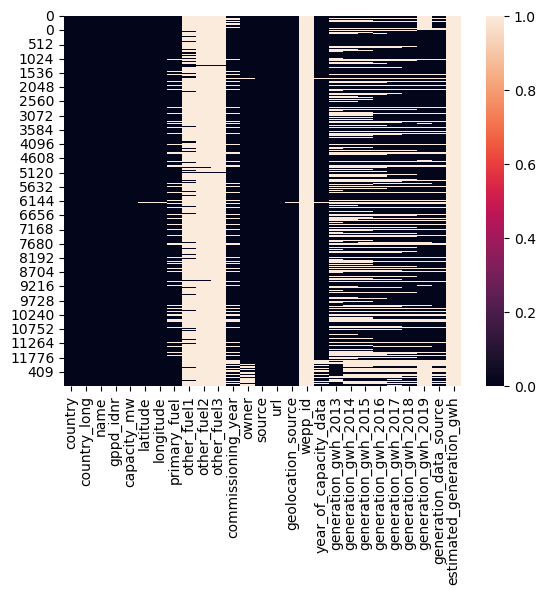

In [32]:
#checking null values using the heatmap
sns.heatmap(df.isnull())

In [33]:
#dropping columns with significantly high null values
df = df.drop(columns=['other_fuel1', 'other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','commissioning_year'])

In [34]:
#dropping uneccessary columns
df = df.drop(columns=['country', 'gppd_idnr','generation_data_source','year_of_capacity_data','name','url','owner','geolocation_source'])

In [35]:
#check data shape after removing some columns
df.shape


(13298, 13)

In [36]:
#checking data information again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_long         13298 non-null  object 
 1   capacity_mw          13292 non-null  float64
 2   latitude             13220 non-null  float64
 3   longitude            13220 non-null  float64
 4   primary_fuel         11294 non-null  object 
 5   source               13298 non-null  object 
 6   generation_gwh_2013  7170 non-null   float64
 7   generation_gwh_2014  7534 non-null   float64
 8   generation_gwh_2015  7993 non-null   float64
 9   generation_gwh_2016  8701 non-null   float64
 10  generation_gwh_2017  9292 non-null   float64
 11  generation_gwh_2018  9858 non-null   float64
 12  generation_gwh_2019  9778 non-null   object 
dtypes: float64(9), object(4)
memory usage: 1.4+ MB


In [37]:
#checking why a column is labelled to contain object data instead of it being float
df['generation_gwh_2019'].unique()

array([nan, 2.467, 1.332, ..., 1.589, 72.06506,
       'Central Electricity Authority'], dtype=object)

In [38]:
#replacing object data with null values
df["generation_gwh_2019"]=df["generation_gwh_2019"].replace("Central Electricity Authority",np.nan)
df["generation_gwh_2019"].value_counts()

generation_gwh_2019
0.000000      366
0.001000       13
0.005000       12
0.003000        9
0.008000        9
             ... 
324.594000      1
150.639000      1
51.005000       1
213.495571      1
72.065060       1
Name: count, Length: 8367, dtype: int64

In [39]:
#checking data information again to see if the 'generation_gwh_2019' data type has changed
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_long         13298 non-null  object 
 1   capacity_mw          13292 non-null  float64
 2   latitude             13220 non-null  float64
 3   longitude            13220 non-null  float64
 4   primary_fuel         11294 non-null  object 
 5   source               13298 non-null  object 
 6   generation_gwh_2013  7170 non-null   float64
 7   generation_gwh_2014  7534 non-null   float64
 8   generation_gwh_2015  7993 non-null   float64
 9   generation_gwh_2016  8701 non-null   float64
 10  generation_gwh_2017  9292 non-null   float64
 11  generation_gwh_2018  9858 non-null   float64
 12  generation_gwh_2019  9777 non-null   float64
dtypes: float64(10), object(3)
memory usage: 1.4+ MB


In [40]:
# filling null values with median in numerical columns

df[['capacity_mw', 'latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']] = df[['capacity_mw', 'latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']].fillna(df[['capacity_mw', 'latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']].median())



In [41]:
#Fill the null values for primary_fuel this is object data
df["primary_fuel"].fillna( method ='ffill', inplace = True)

In [42]:
#checking for null values(there are no null values)
df.isnull().sum()

country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [43]:
#checking for null values
df.isnull().sum()#all null values have been dealt with

country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

<Axes: >

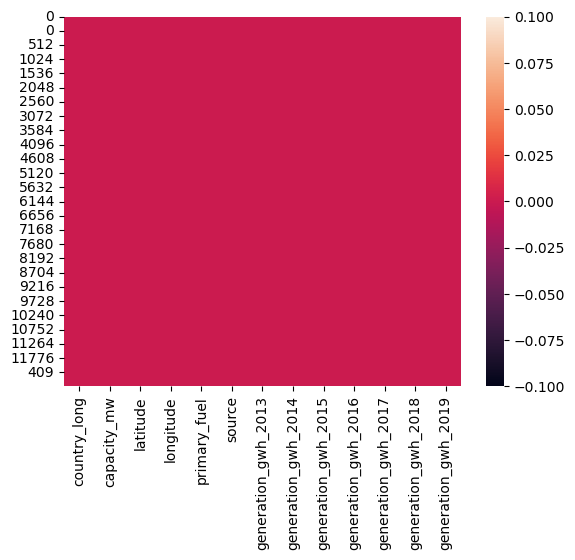

In [44]:
#checking null values using the heatmap
sns.heatmap(df.isnull())

In [45]:
#Statistical summary of numerical columns
df.describe().T

count        mean          std       min        25%  \
capacity_mw          13298.0  117.688075   347.098888    0.0000    1.50000   
latitude             13298.0   35.072784    15.400938  -42.8883   33.91425   
longitude            13298.0  -73.873706    62.692711 -171.7124 -104.58340   
generation_gwh_2013  13298.0  313.618733  1515.223100 -947.6000   15.06350   
generation_gwh_2014  13298.0  369.819541  1678.509435 -989.6190   12.71875   
generation_gwh_2015  13298.0  378.520539  1690.892264 -864.4280    9.14075   
generation_gwh_2016  13298.0  372.907810  1678.766047 -768.6200    6.40025   
generation_gwh_2017  13298.0  376.112976  1689.845051 -934.9440    5.03425   
generation_gwh_2018  13298.0  383.981725  1704.730034 -982.6220    4.08850   
generation_gwh_2019  13298.0  313.205817  1462.785069 -780.3390    4.50250   

                           50%        75%         max  
capacity_mw           5.500000  52.650000   6809.0000  
latitude             38.389750  42.166025    425.2461  
longitude           -87.346000 -75.535425    153.4341  
generation_gwh_2013  21.384500  27.758750  31431.0800  
generation_gwh_2014  22.241000  34.949500  32320.9170  
generation_gwh_2015  19.504000  40.148450  32525.5950  
generation_gwh_2016  15.410278  45.893500  32377.4770  
generation_gwh_2017  13.433861  51.903250  35116.0000  
generation_gwh_2018  12.308500  56.527000  35136.0000  
generation_gwh_2019  11.280130  46.123750  31920.3680

In [ ]:
General view
#from the statistical description above the count of all columns are similar therefore no missing data values
#the presence of negaitve values shows that the data is not of good quality
#where mean value of a column is greater than the median(second percentile)the data is skewed to the right.Notably,
 capacity_mw,generation_gwh_2013 to generation_gwh_2019. This will be dealt with later.
#in the following columns respectively,latitude,longitude and commisioning year  the mean is less than median 
 demonstrating that the data is skewed to the left
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data. 

Column specific statistical view

capacity_mw: The average price of capacity is approximately 117.69, with a minimum of 0.00 and a maximum of 6809.00.The standard
             debviation of 347 shows great variability in the capacity column

latitude: The average value is 34.88 ranging  from a minimum of 42.89 a maximum of 425.25.

longitude: The average longitude is -73.33. The minimum values is -171.71 and maximum value is 153.43.
    
the columns-generation_gwh_2013 to generation_gwh_2019 all have a negative minimum value,the highest average was recorded in generation_gwh_2018,
                                 and maximum value in the same column

In [46]:
#Summary of columns with categorical data
df.describe(include='object')

country_long primary_fuel  \
count                      13298        13298   
unique                         3           14   
top     United States of America        Solar   
freq                       11879         4230   

                                        source  
count                                    13298  
unique                                     206  
top     U.S. Energy Information Administration  
freq                                     11833

In [ ]:
#Similar to numerical data records,there are 13298 records under the type label.There are 3 unique categories country_long.The top and most frequent one being USA
#In the same way,there are 14 unique primary fuel types,206 uniques data sources.T


In [47]:
#Split between Categorical and Numerical columns

categorical = ['country_long', 'primary_fuel', 'source']
numerical = ['capacity_mw', 'latitude', 'longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']

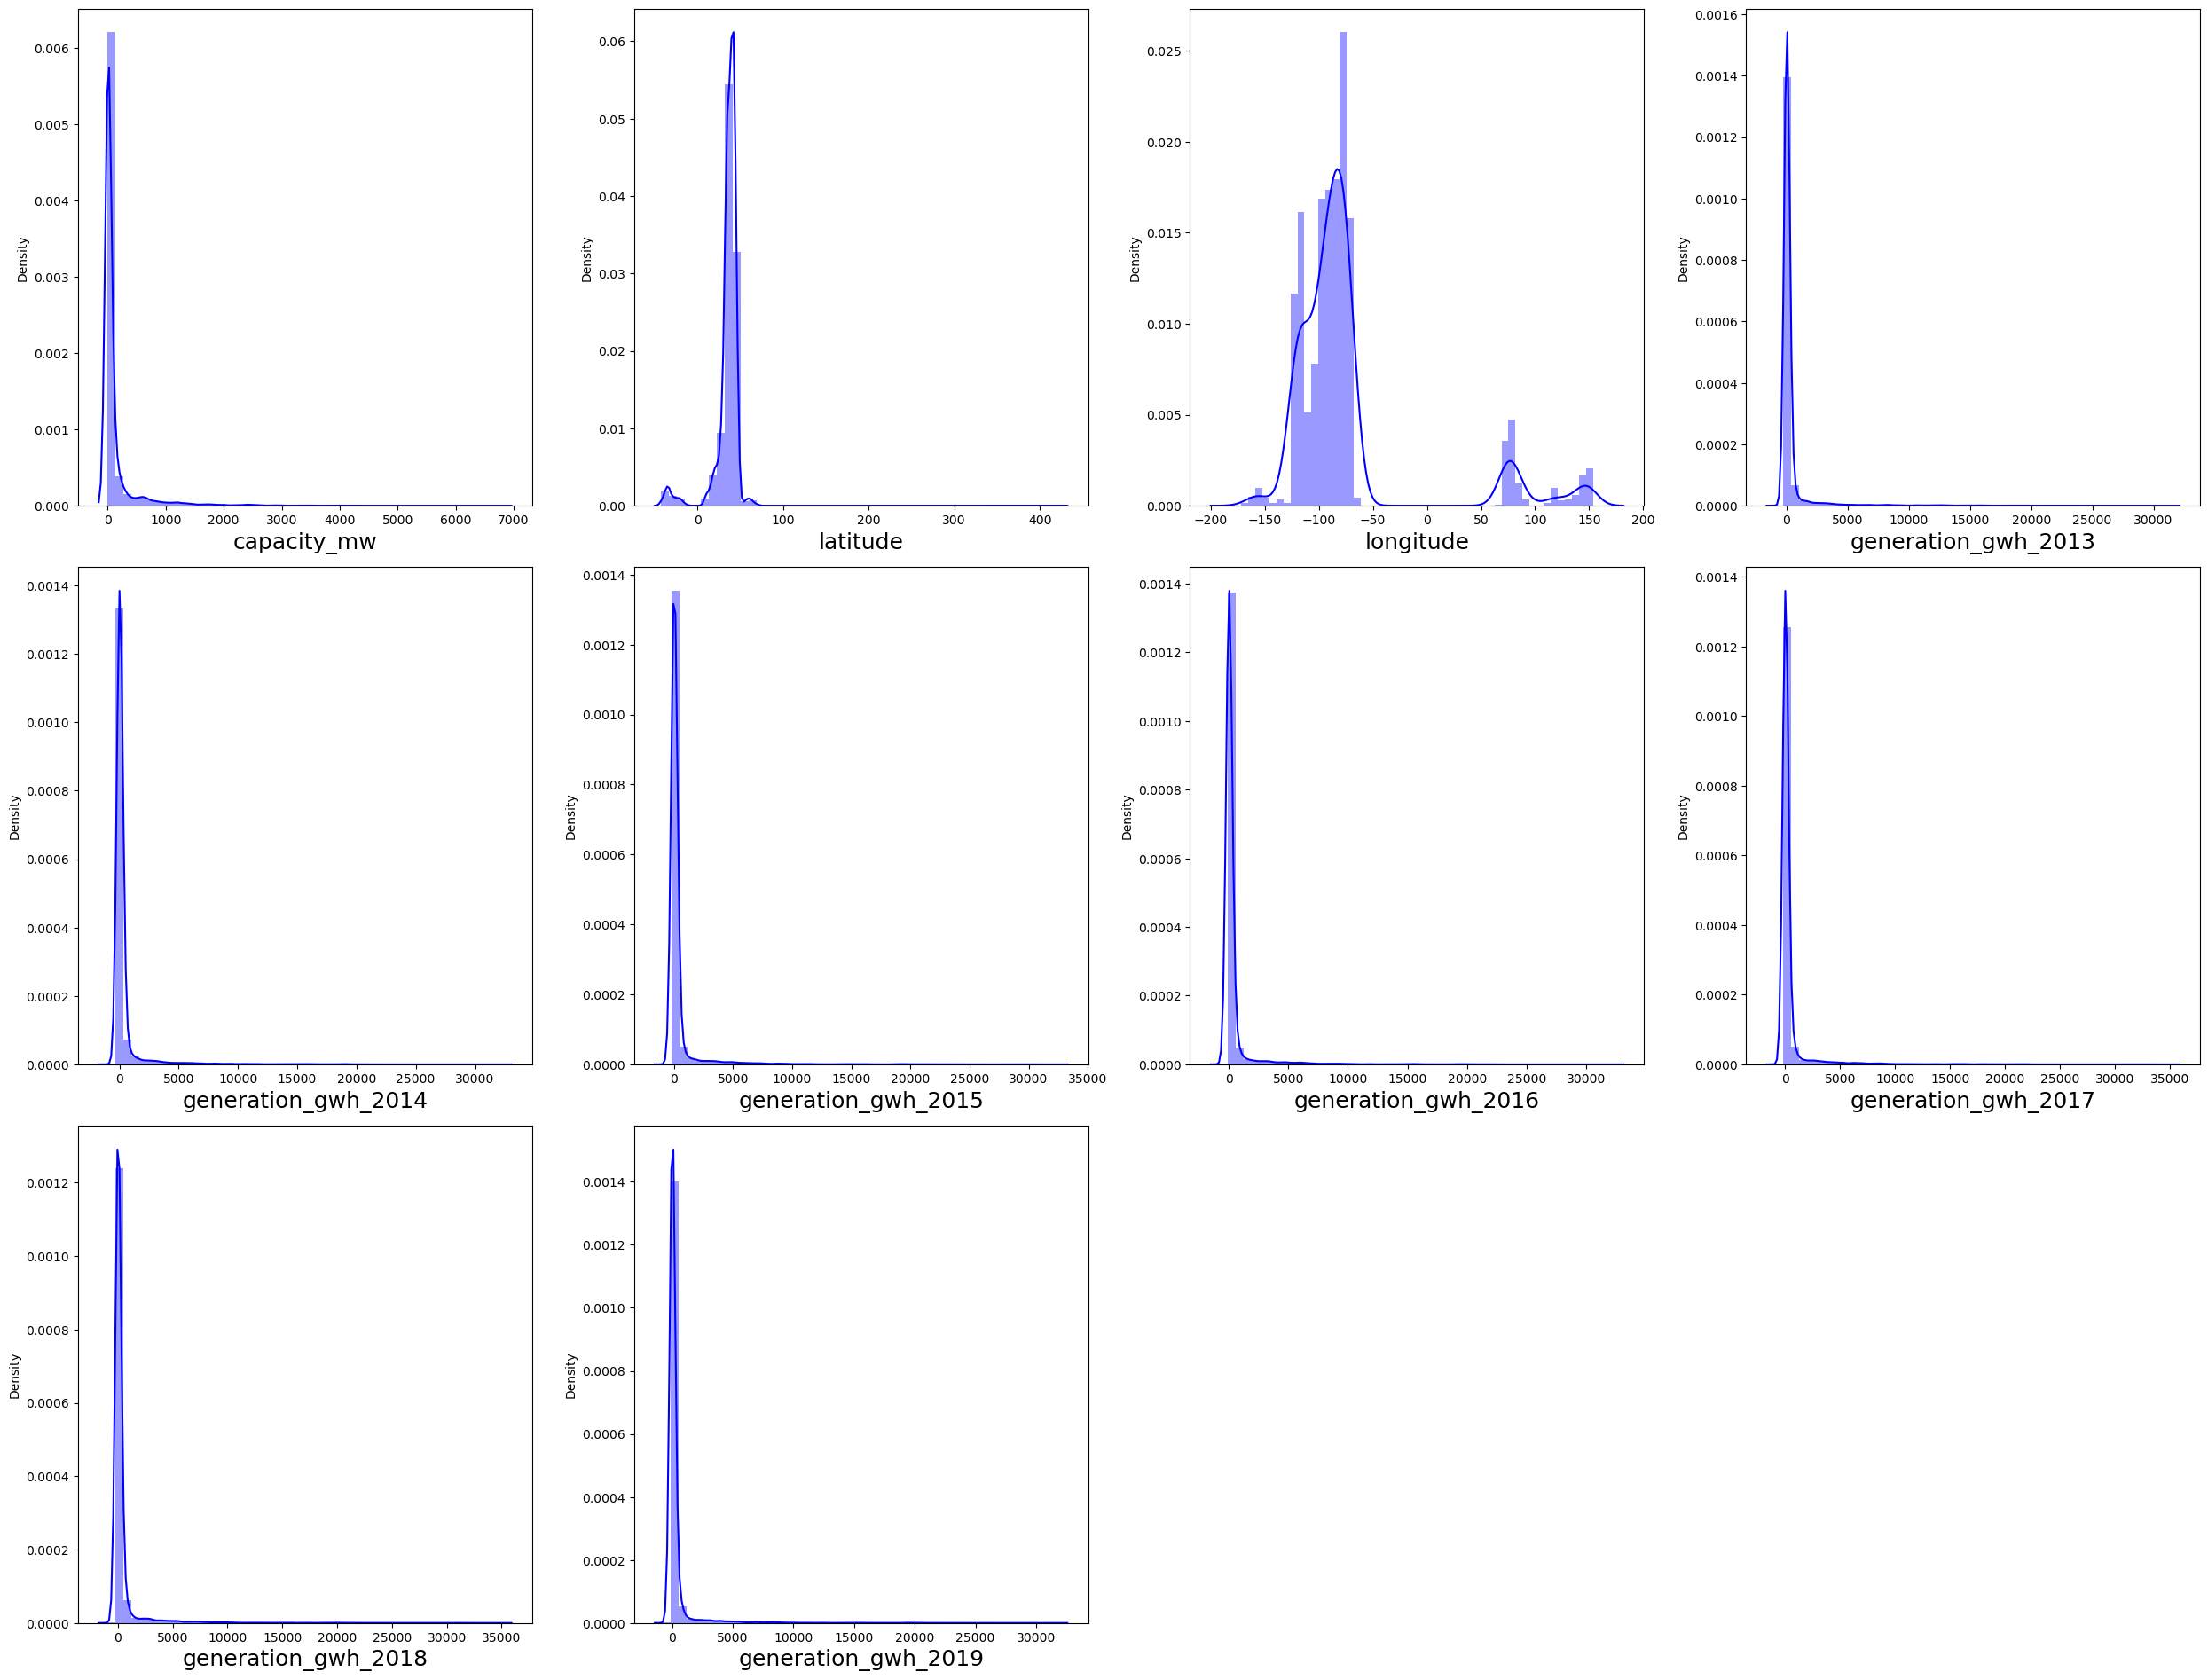

In [48]:
#Checking the distribution of data using distribution plot
#I see a lot of skeweness which will be explained below and dealt with later

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=10:
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

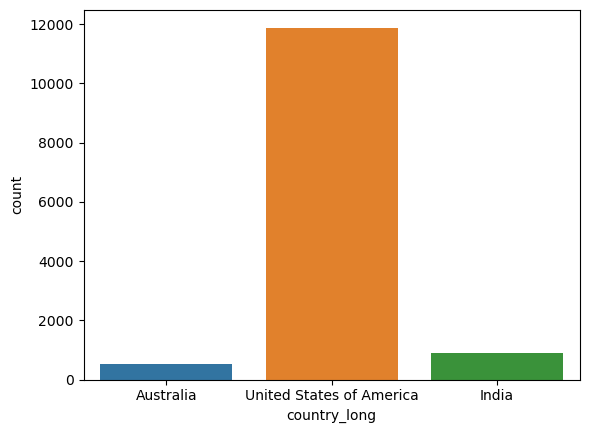

In [49]:
#Data Visualizaton -Univariate Analysis for categorical columns

#Visualize attrition
ax=sns.countplot(x='country_long',data=df)
plt.show()

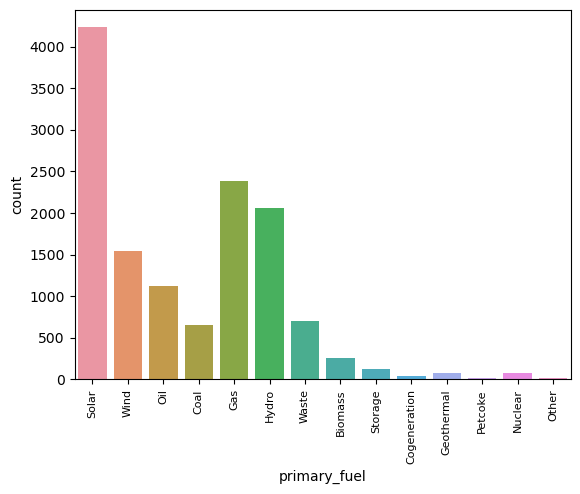

In [50]:
ax=sns.countplot(x='primary_fuel',data=df)
plt.xticks(rotation=90, fontsize=8)
plt.show()

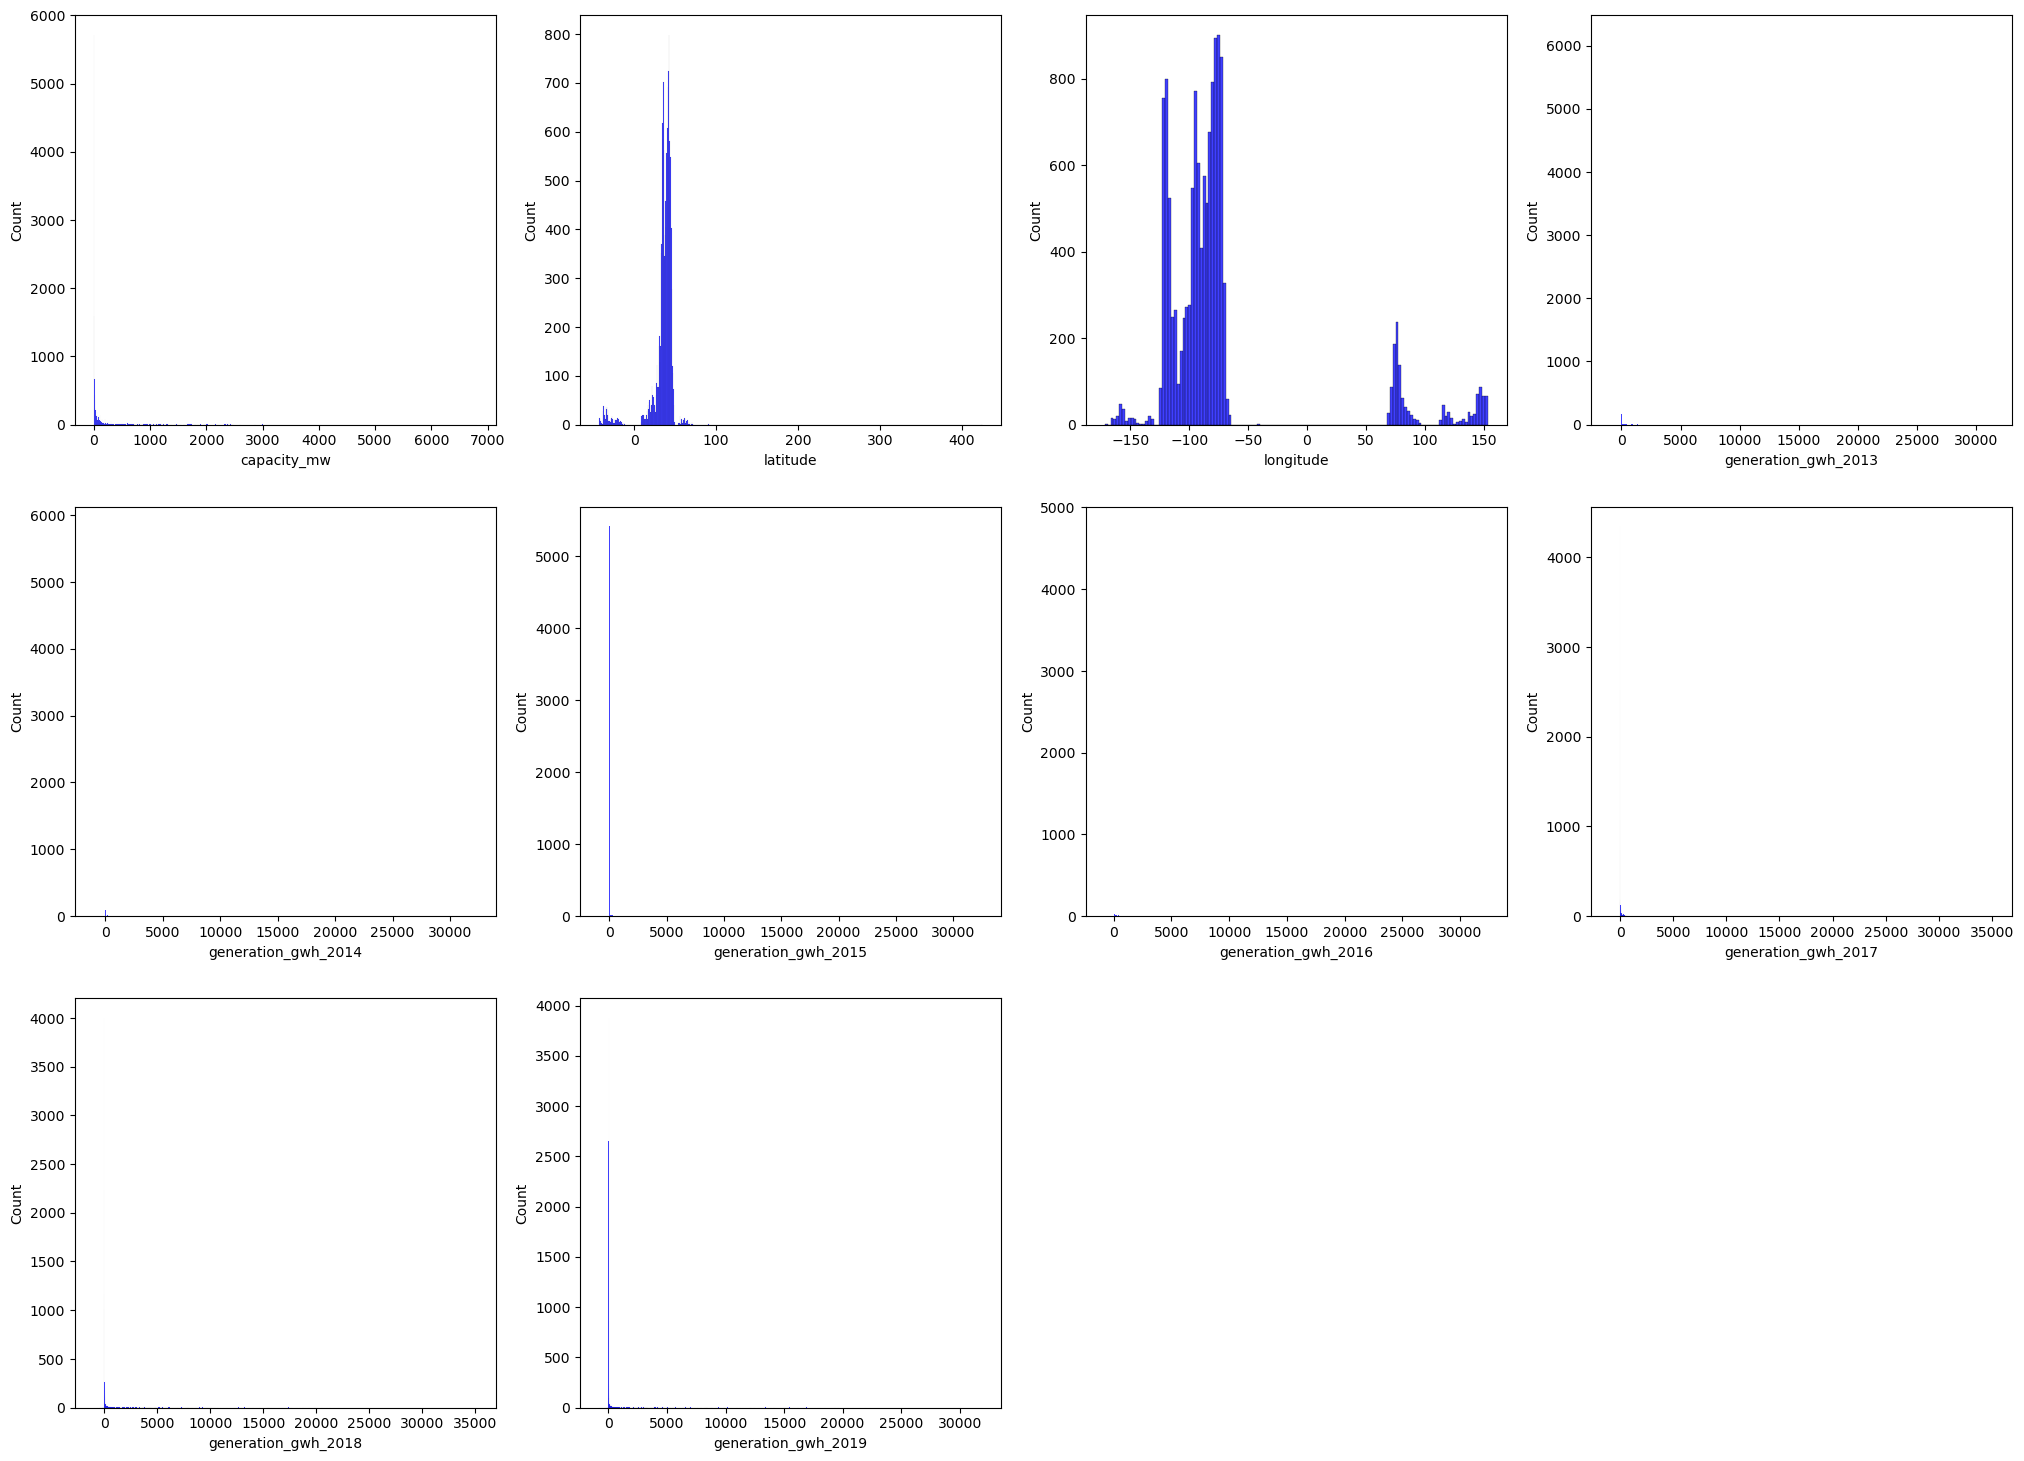

In [51]:
#Univariate Analysis for numerical columns
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=10:
        ax = plt.subplot(8,4,plotnumber)
        sns.histplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=10)
        
    plotnumber +=1
plt.show()

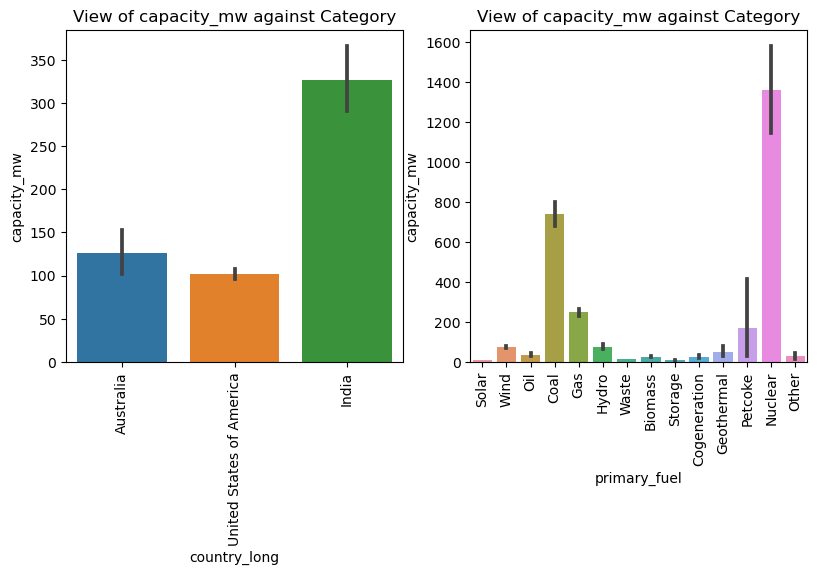

In [52]:
#Bivariate analysis of target variable versus categorical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in categorical:
    if p<=2:
        plt.subplot(5,4,p)
        sns.barplot(x=df[column],y='capacity_mw',data=df)
    plt.title("View of capacity_mw against Category")
    plt.xticks(rotation=90, fontsize=10)
      
    p+= 1
plt.show()

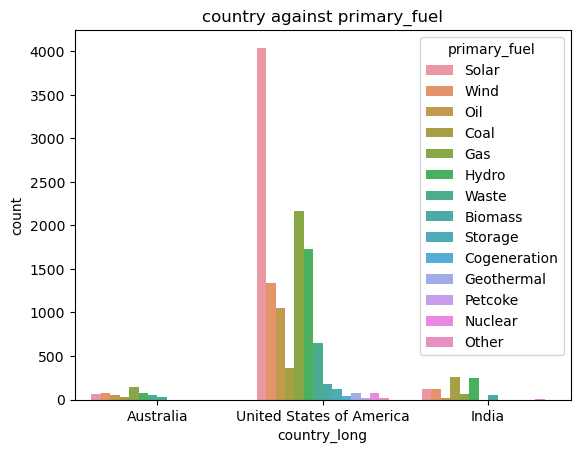

In [53]:
ax= sns.countplot(x='country_long', hue='primary_fuel',data=df)
plt.title("country against primary_fuel")
plt.show()

In [55]:
#India generates the most power,followed by Australia and the US
#Nuclear and Coal respectively are the top two types of the most common fuel
#the most power is generated by nuclear followed by coal
#In Australia the most common fuel type is Gas
#In USA the most common fuel type is Solar
#In India the most common fuel type is Gas

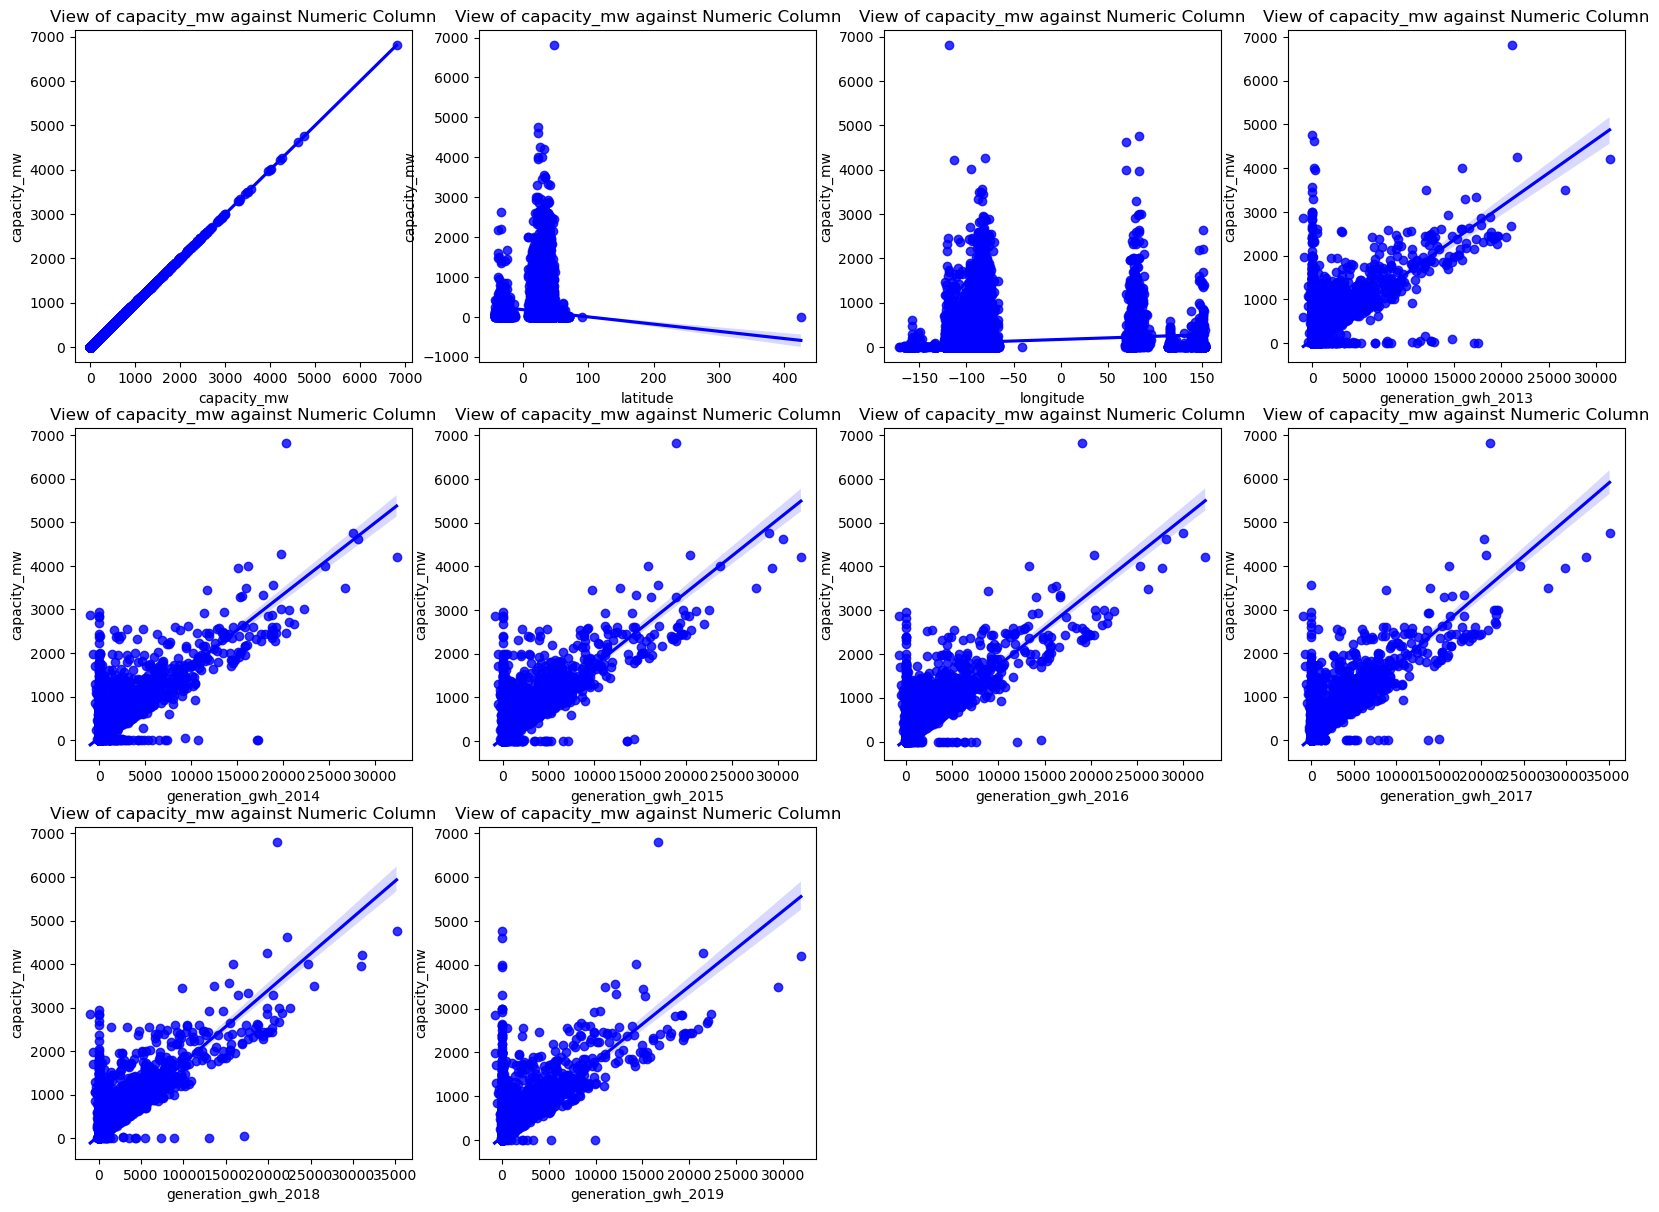

In [54]:
#Bivariate analysis of capacity_mw versus numerical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in numerical:
    if p<=10:
        plt.subplot(5,4,p)
        sns.regplot(x=df[i],y='capacity_mw',data=df,color='blue')
        plt.title("View of capacity_mw against Numeric Column")
      
    p+= 1
plt.show()

In [ ]:
#there is a negative relationship between latitude and capacity of power generated.
#there is a weak positive relationship between longitude and capacity of power generated.
#I can also see that there is a strong positive correlation between capacity generated and generation per year

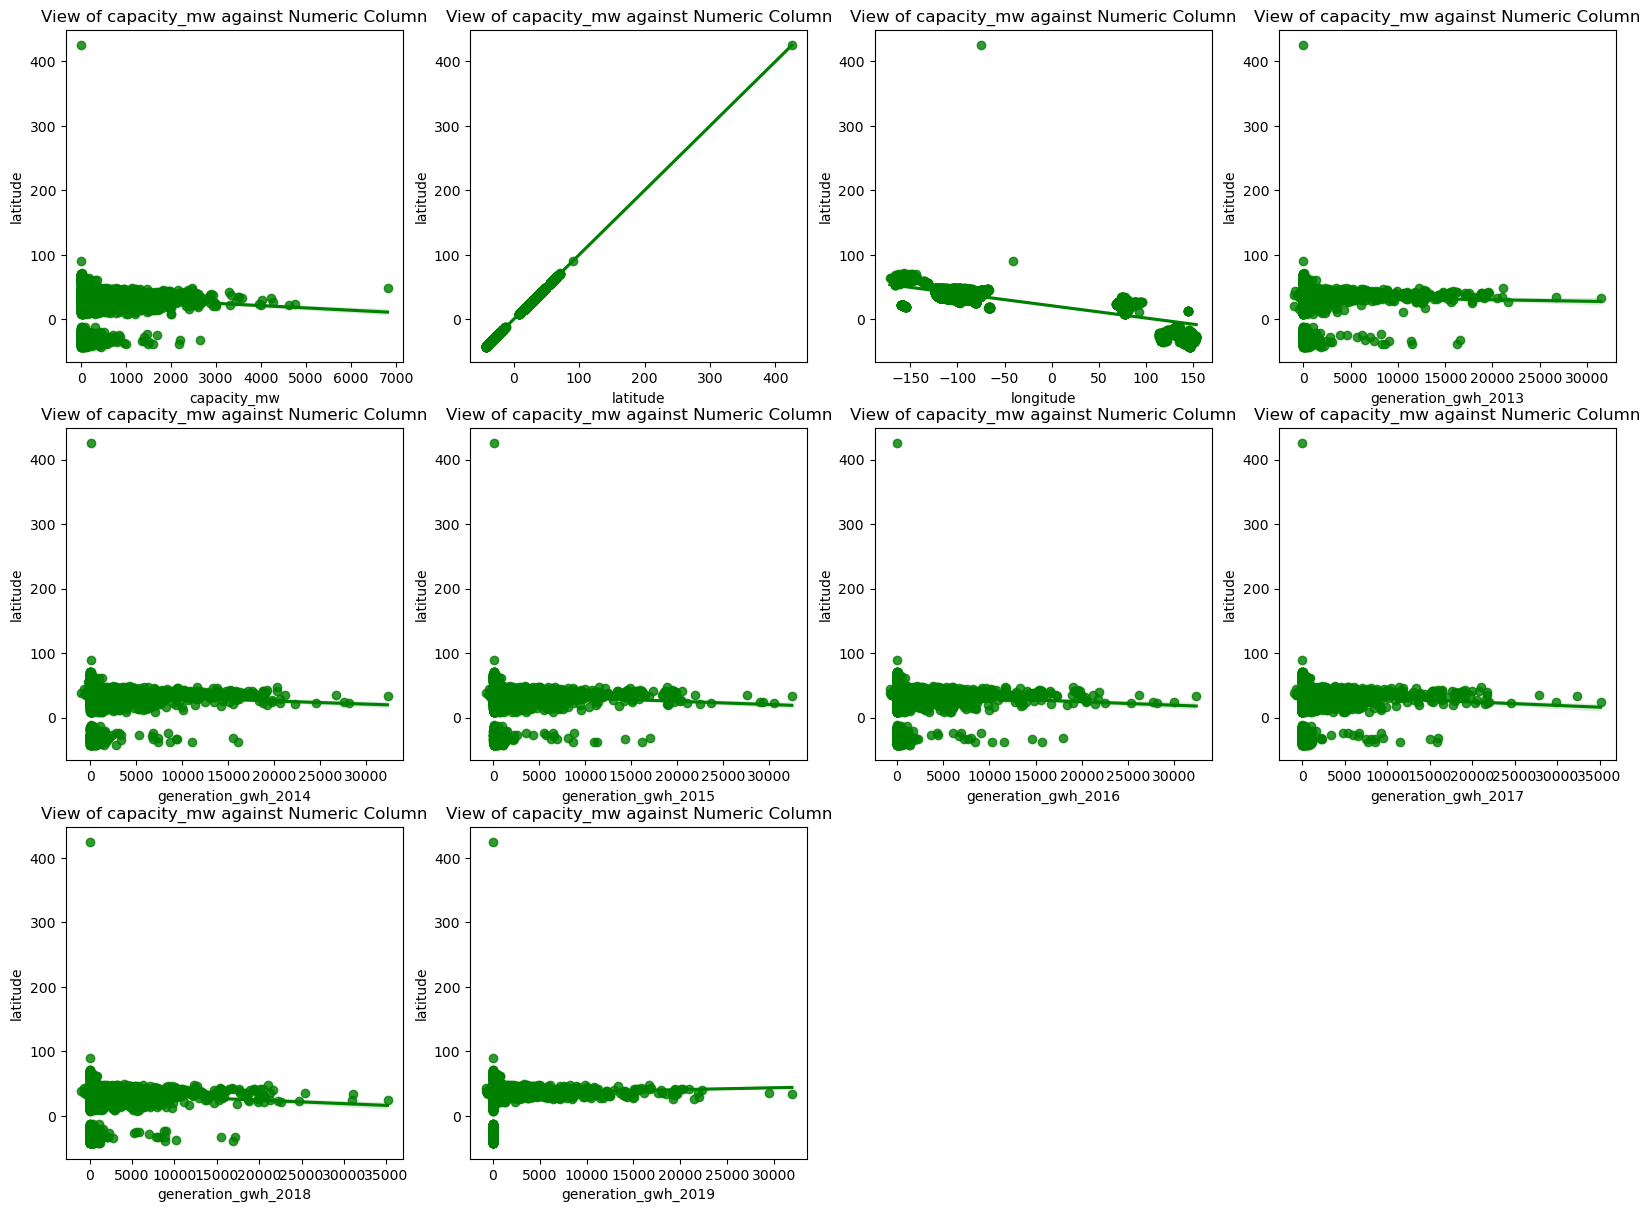

In [55]:
plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in numerical:
    if p<=10:
        plt.subplot(5,4,p)
        sns.regplot(x=df[i],y='latitude',data=df,color='green')
        plt.title("View of capacity_mw against Numeric Column")
      
    p+= 1
plt.show()


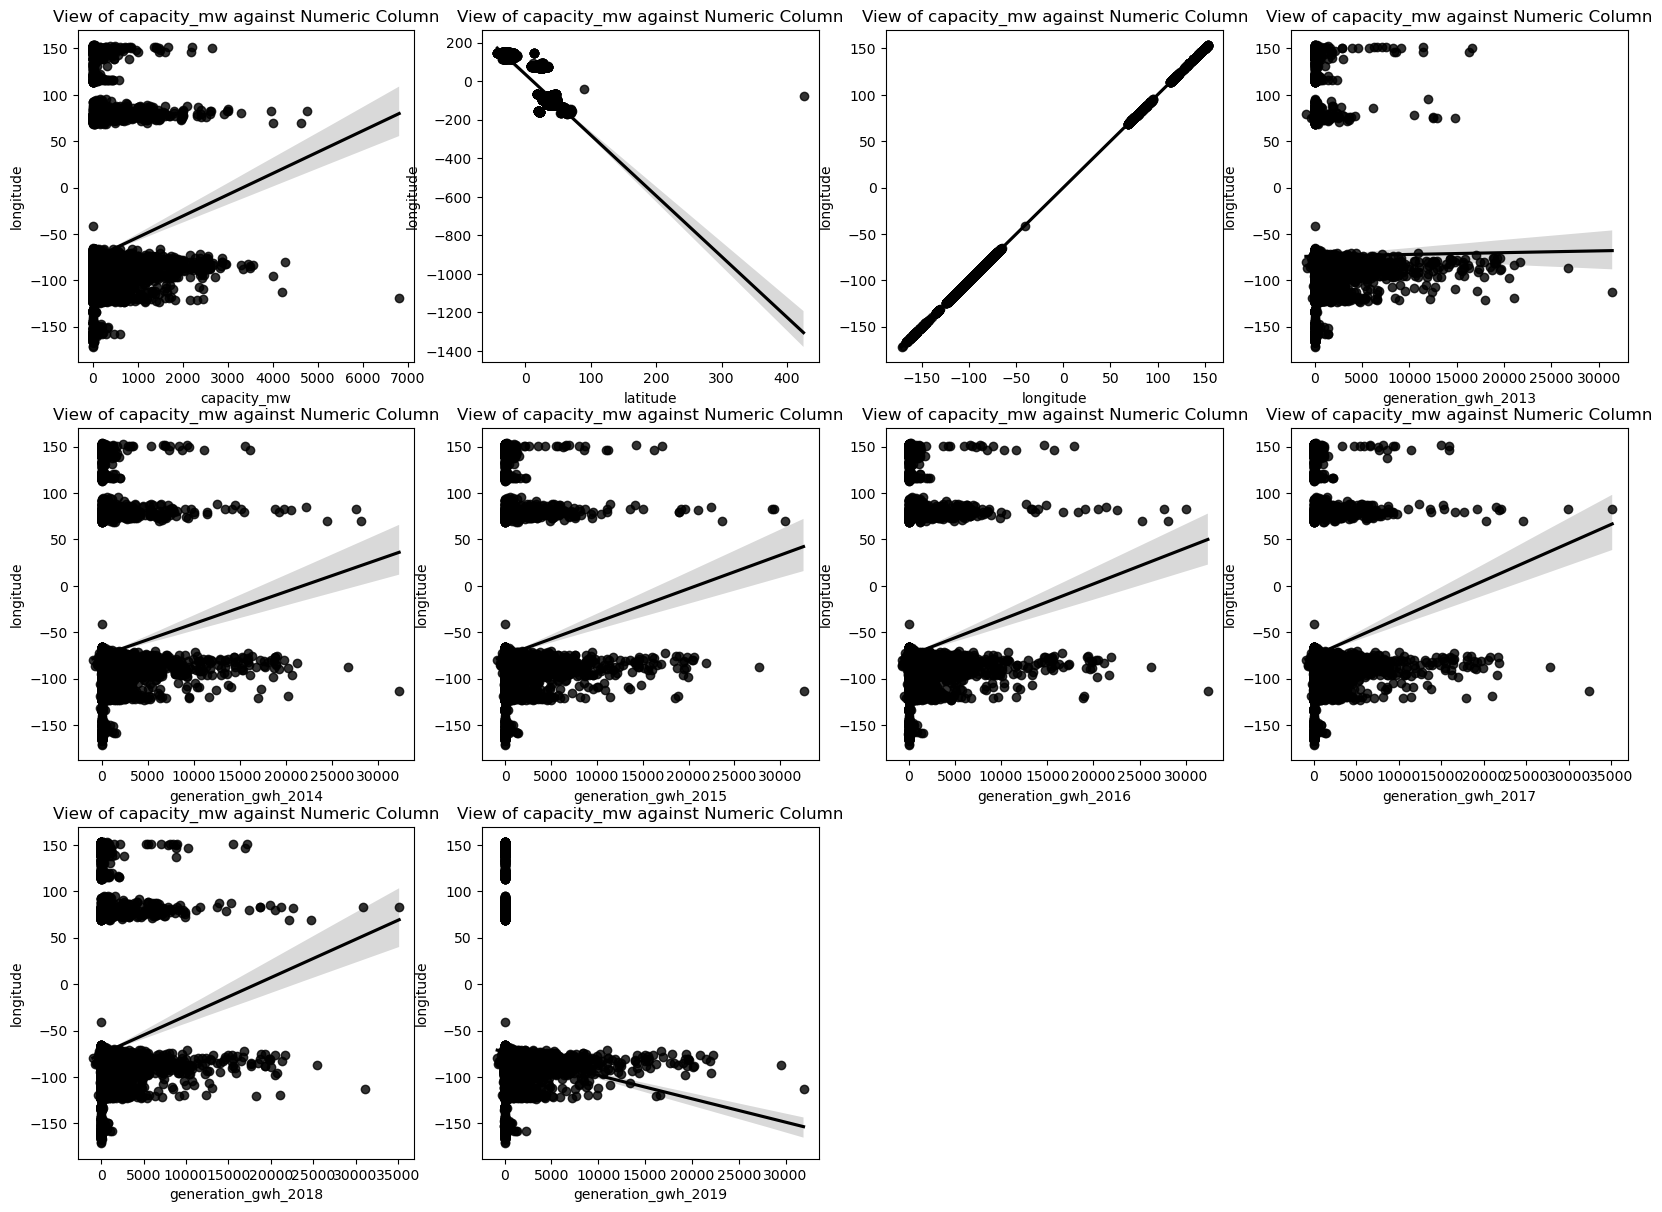

In [56]:
plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in numerical:
    if p<=10:
        plt.subplot(5,4,p)
        sns.regplot(x=df[i],y='longitude',data=df,color='black')
        plt.title("View of capacity_mw against Numeric Column")
      
    p+= 1
plt.show()

In [ ]:
#It appears that there is a negative correlation between longitude and latitude
#there is no relationship between longitude and capacity of power generated per year.

In [ ]:
Multivariate analysis

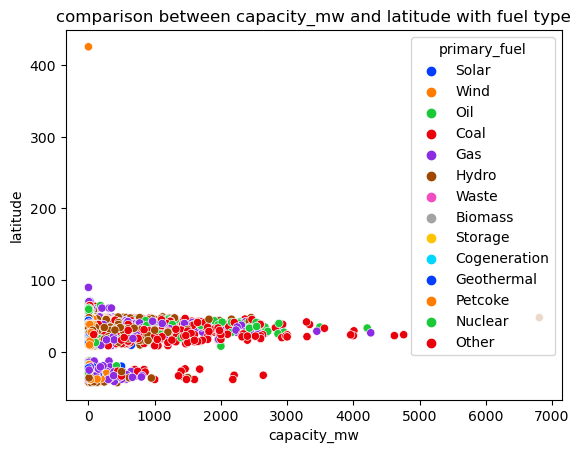

In [57]:
plt.title("comparison between capacity_mw and latitude with fuel type")
sns.scatterplot(x='capacity_mw',y='latitude',data=df,hue='primary_fuel',palette='bright')
plt.show()

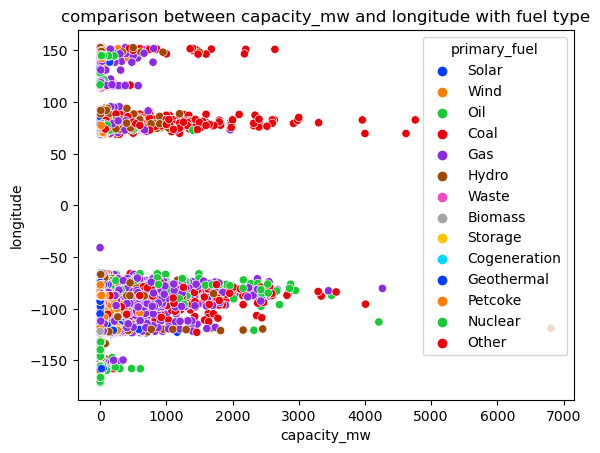

In [58]:
plt.title("comparison between capacity_mw and longitude with fuel type")
sns.scatterplot(x='capacity_mw',y='longitude',data=df,hue='primary_fuel',palette='bright')
plt.show()#there is a weak positive relationship between longitude and capacity of power generated.

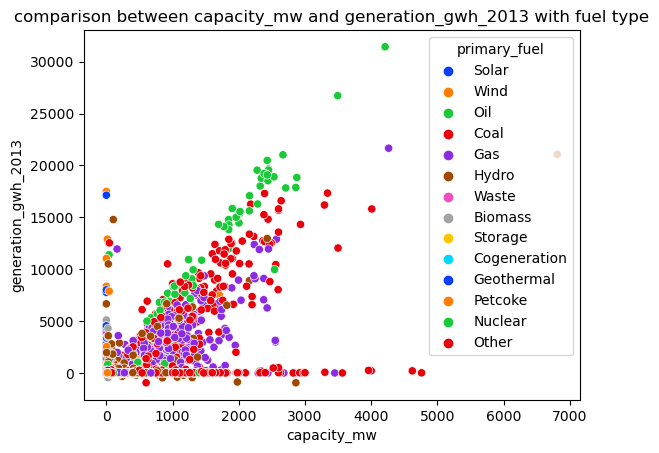

In [59]:
plt.title("comparison between capacity_mw and generation_gwh_2013 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df,hue='primary_fuel',palette='bright')
plt.show()

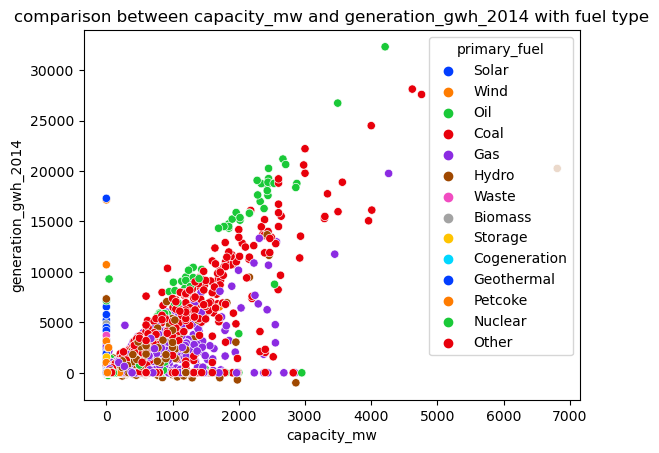

In [60]:
plt.title("comparison between capacity_mw and generation_gwh_2014 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df,hue='primary_fuel',palette='bright')
plt.show()

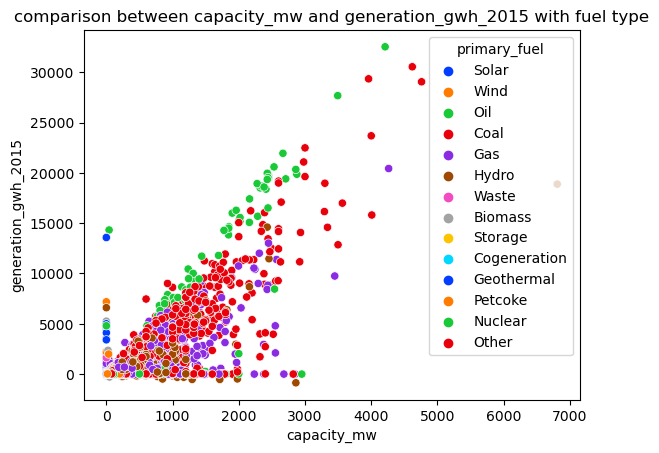

In [61]:
plt.title("comparison between capacity_mw and generation_gwh_2015 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df,hue='primary_fuel',palette='bright')
plt.show()

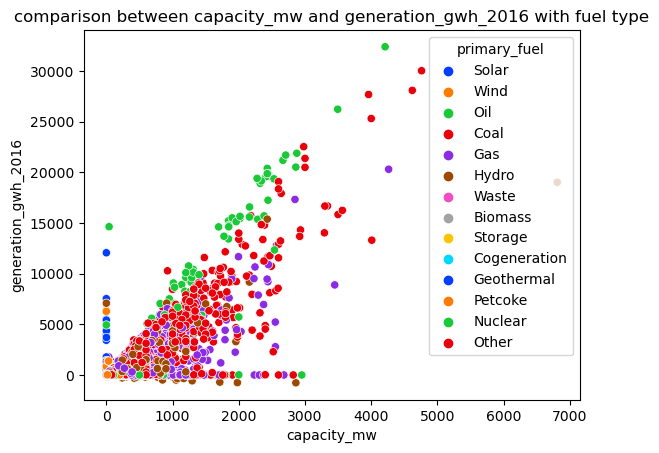

In [62]:
plt.title("comparison between capacity_mw and generation_gwh_2016 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df,hue='primary_fuel',palette='bright')
plt.show()

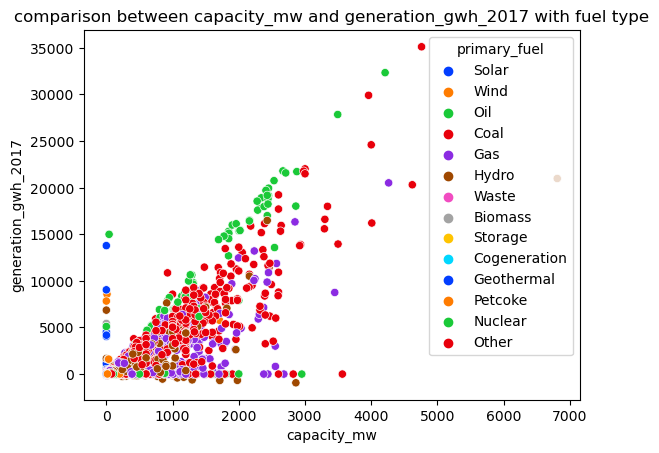

In [63]:
plt.title("comparison between capacity_mw and generation_gwh_2017 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df,hue='primary_fuel',palette='bright')
plt.show()

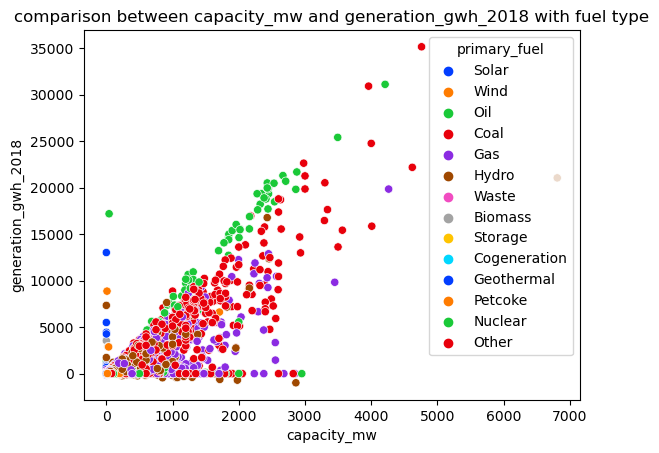

In [64]:
plt.title("comparison between capacity_mw and generation_gwh_2018 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df,hue='primary_fuel',palette='bright')
plt.show()

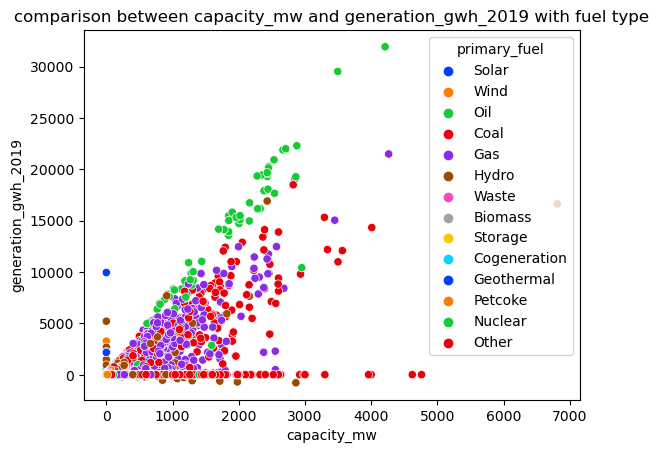

In [65]:
plt.title("comparison between capacity_mw and generation_gwh_2019 with fuel type")
sns.scatterplot(x='capacity_mw',y='generation_gwh_2019',data=df,hue='primary_fuel',palette='bright')
plt.show()

In [ ]:
In the scatterplots above for multivaraite analysis,the fuel type dots represent the density of each and the below remains true as before
#there is a negative relationship between latitude and capacity of power generated.
#there is a weak positive relationship between longitude and capacity of power generated.
#I can also see that there is a strong positive correlation between capacity generated and generation per year

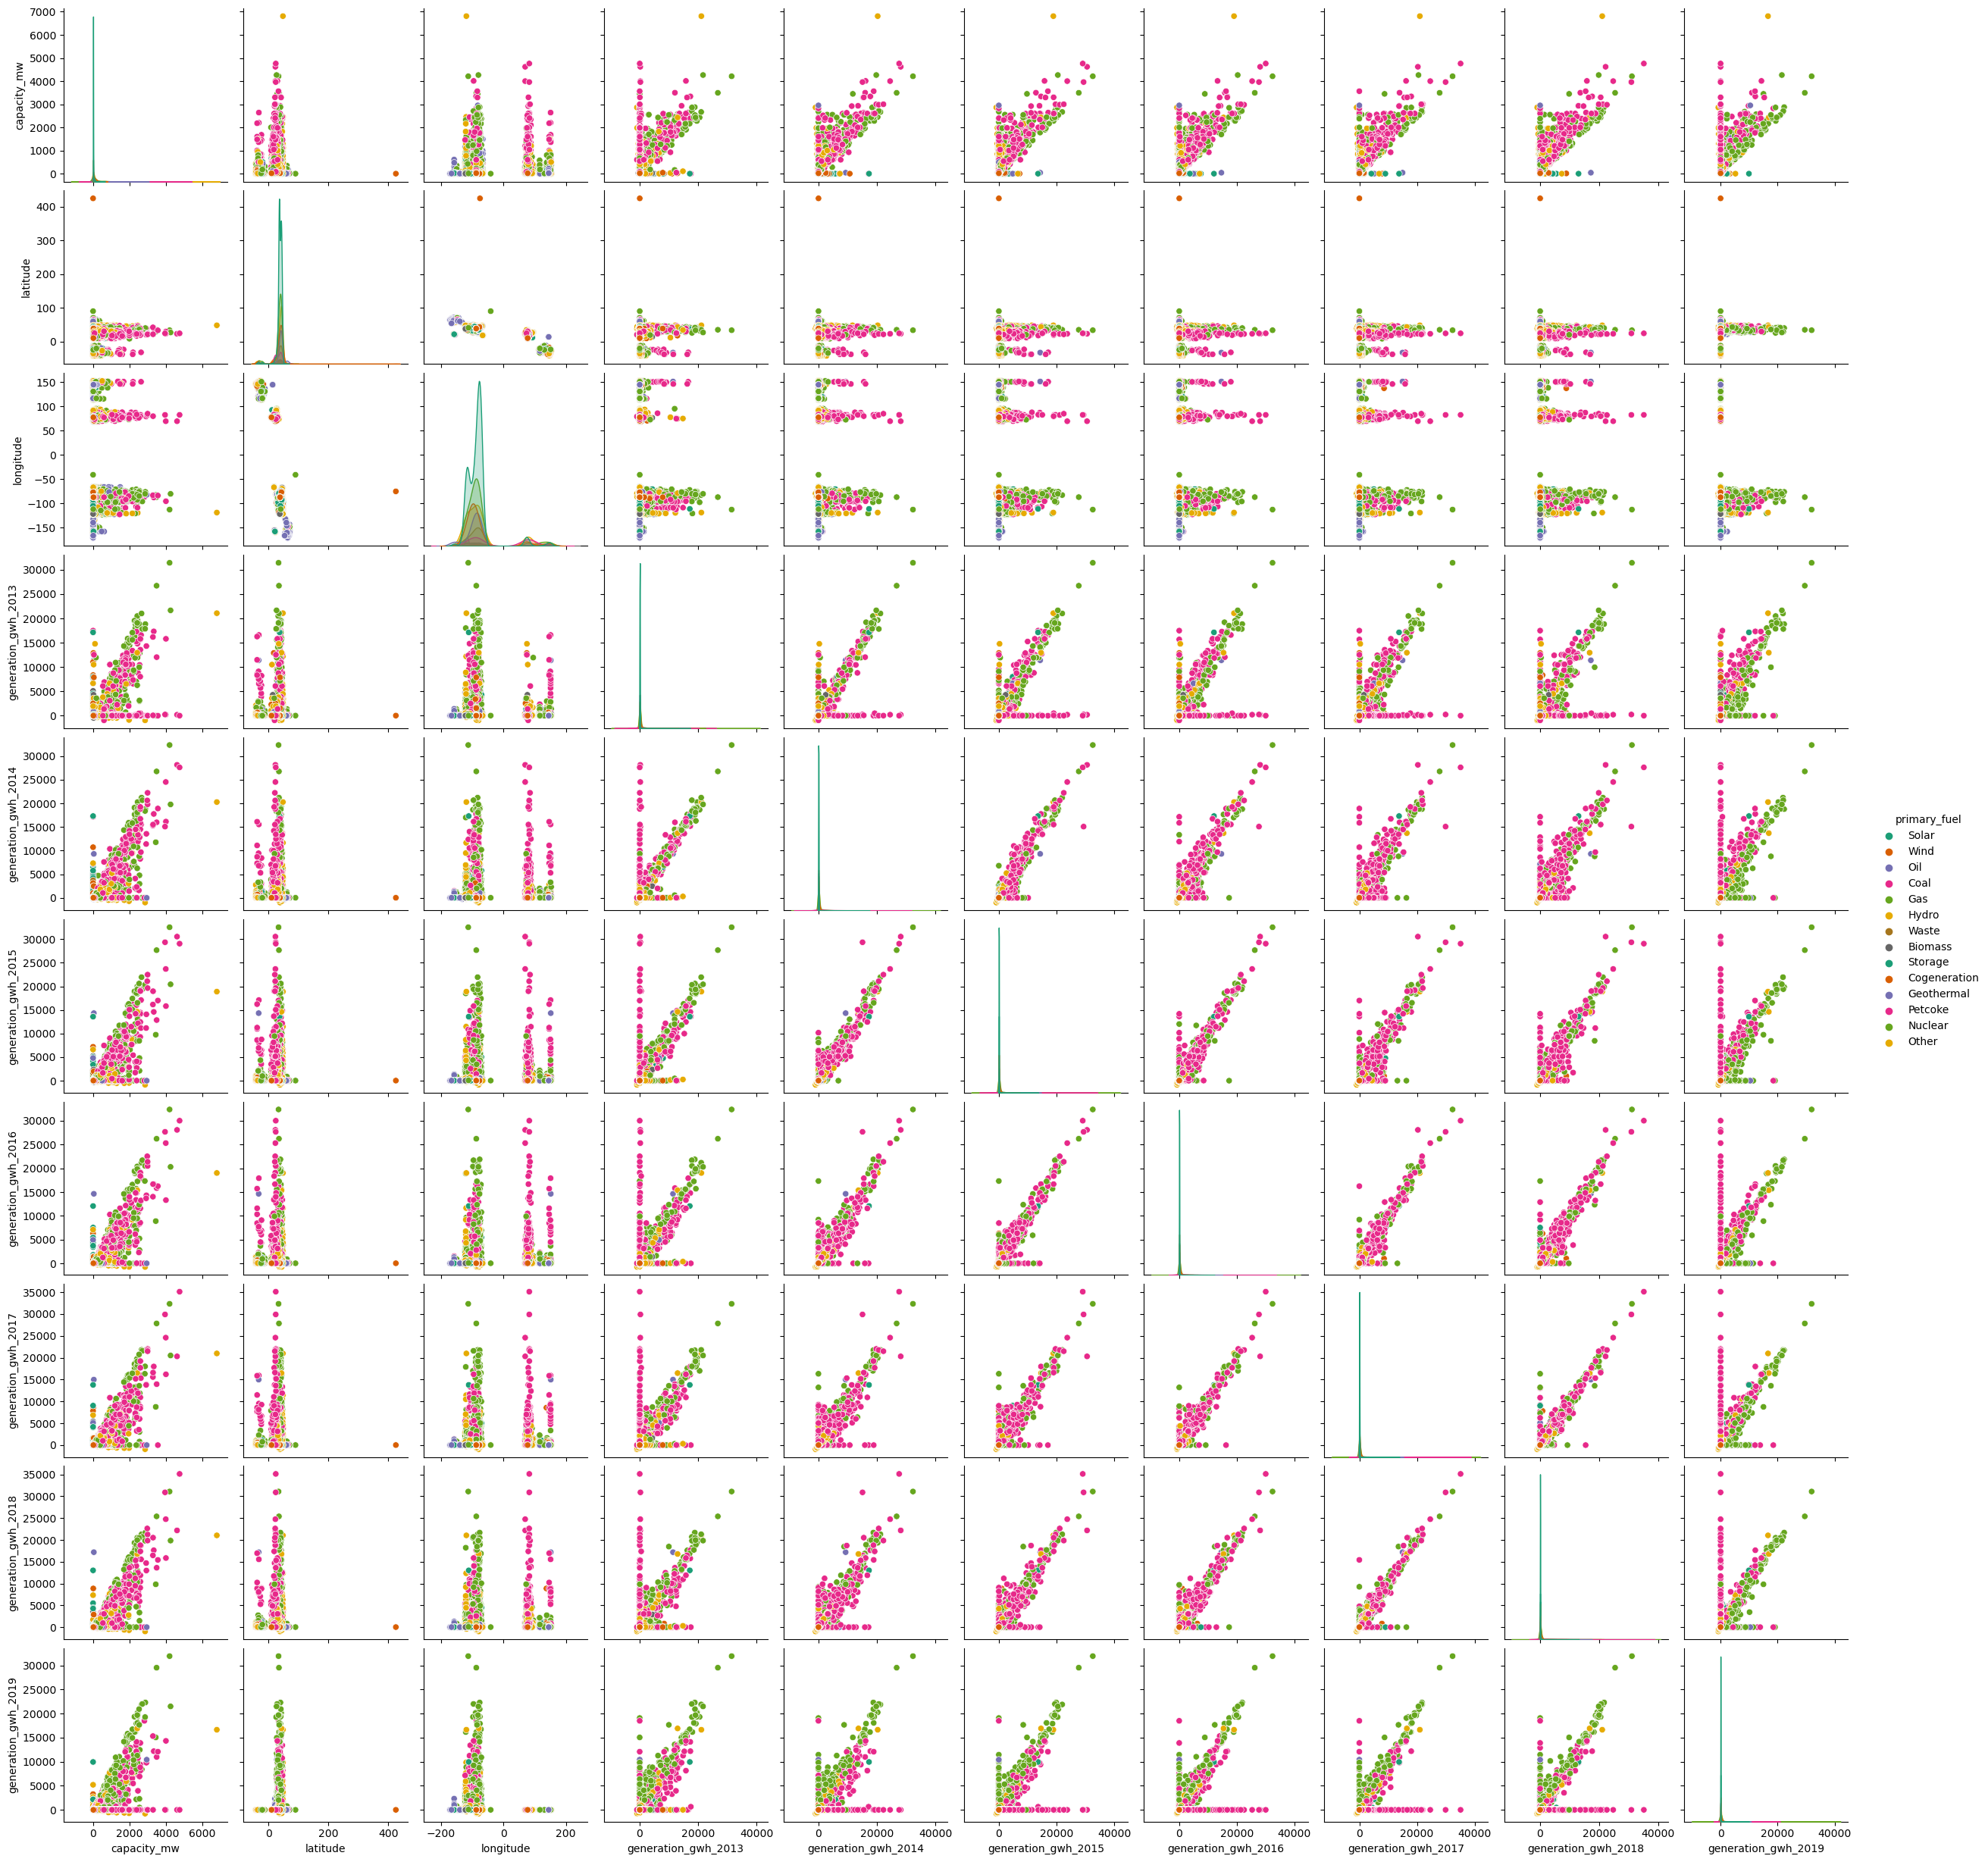

In [66]:
#Multivariate analysis
sns.pairplot(data =df,hue='primary_fuel',palette="Dark2")
plt.show()

In [67]:
#Transforming categorical into numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['primary_fuel'] = le.fit_transform(df['primary_fuel'])

df['country_long'] = le.fit_transform(df['country_long'])

df['source'] = le.fit_transform(df['source'])

df.head()

country_long  capacity_mw  latitude  longitude  primary_fuel  source  \
0             0         0.11  -34.9387   138.5377            10      12   
1             0         1.00  -34.9453   138.5882            10      12   
2             0        21.60  -35.0641   117.7977            13      12   
3             0         0.24  -23.7966   133.8971            10      12   
4             0         4.00  -34.5509   138.7659             7      12   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0            21.384500            22.241000            19.504000   
1            21.384500            22.241000            19.504000   
2            89.595278           102.642778            96.555556   
3            21.384500            22.241000            19.504000   
4            21.384500            22.241000            19.504000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            15.410278            13.433861            12.308500   
1            15.410278            13.433861            12.308500   
2            95.872778            85.900278            92.682222   
3            15.410278            13.433861            12.308500   
4            15.410278            13.433861            12.308500   

   generation_gwh_2019  
0             11.28013  
1             11.28013  
2             11.28013  
3             11.28013  
4             11.28013

In [68]:
#Tabular view of Correlation
cor=df.corr()
cor

country_long  capacity_mw  latitude  longitude  \
country_long             1.000000    -0.095464  0.863542  -0.929666   
capacity_mw             -0.095464     1.000000 -0.080457   0.127177   
latitude                 0.863542    -0.080457  1.000000  -0.775378   
longitude               -0.929666     0.127177 -0.775378   1.000000   
primary_fuel             0.122249    -0.316943  0.079175  -0.132382   
source                   0.928912    -0.146256  0.754707  -0.905545   
generation_gwh_2013     -0.000439     0.667360 -0.023424   0.004637   
generation_gwh_2014     -0.068591     0.795624 -0.052091   0.092221   
generation_gwh_2015     -0.072837     0.814142 -0.054830   0.097495   
generation_gwh_2016     -0.078852     0.813790 -0.058400   0.103669   
generation_gwh_2017     -0.083561     0.812694 -0.060082   0.109114   
generation_gwh_2018     -0.085529     0.822004 -0.060251   0.112126   
generation_gwh_2019      0.066834     0.725263  0.027170  -0.058825   

                     primary_fuel    source  generation_gwh_2013  \
country_long             0.122249  0.928912            -0.000439   
capacity_mw             -0.316943 -0.146256             0.667360   
latitude                 0.079175  0.754707            -0.023424   
longitude               -0.132382 -0.905545             0.004637   
primary_fuel             1.000000  0.143852            -0.179175   
source                   0.143852  1.000000             0.004862   
generation_gwh_2013     -0.179175  0.004862             1.000000   
generation_gwh_2014     -0.216822 -0.103831             0.827239   
generation_gwh_2015     -0.224547 -0.110180             0.800063   
generation_gwh_2016     -0.218363 -0.118652             0.767244   
generation_gwh_2017     -0.216050 -0.125241             0.769788   
generation_gwh_2018     -0.219406 -0.128894             0.739651   
generation_gwh_2019     -0.177995  0.069454             0.838772   

                     generation_gwh_2014  generation_gwh_2015  \
country_long                   -0.068591            -0.072837   
capacity_mw                     0.795624             0.814142   
latitude                       -0.052091            -0.054830   
longitude                       0.092221             0.097495   
primary_fuel                   -0.216822            -0.224547   
source                         -0.103831            -0.110180   
generation_gwh_2013             0.827239             0.800063   
generation_gwh_2014             1.000000             0.969961   
generation_gwh_2015             0.969961             1.000000   
generation_gwh_2016             0.937811             0.964323   
generation_gwh_2017             0.919601             0.942955   
generation_gwh_2018             0.912850             0.941790   
generation_gwh_2019             0.756269             0.765927   

                     generation_gwh_2016  generation_gwh_2017  \
country_long                   -0.078852            -0.083561   
capacity_mw                     0.813790             0.812694   
latitude                       -0.058400            -0.060082   
longitude                       0.103669             0.109114   
primary_fuel                   -0.218363            -0.216050   
source                         -0.118652            -0.125241   
generation_gwh_2013             0.767244             0.769788   
generation_gwh_2014             0.937811             0.919601   
generation_gwh_2015             0.964323             0.942955   
generation_gwh_2016             1.000000             0.969369   
generation_gwh_2017             0.969369             1.000000   
generation_gwh_2018             0.956269             0.966072   
generation_gwh_2019             0.762145             0.765051   

                     generation_gwh_2018  generation_gwh_2019  
country_long                   -0.085529             0.066834  
capacity_mw                     0.822004             0.725263  
latitude                       -0.060251             0.0271

<Axes: >

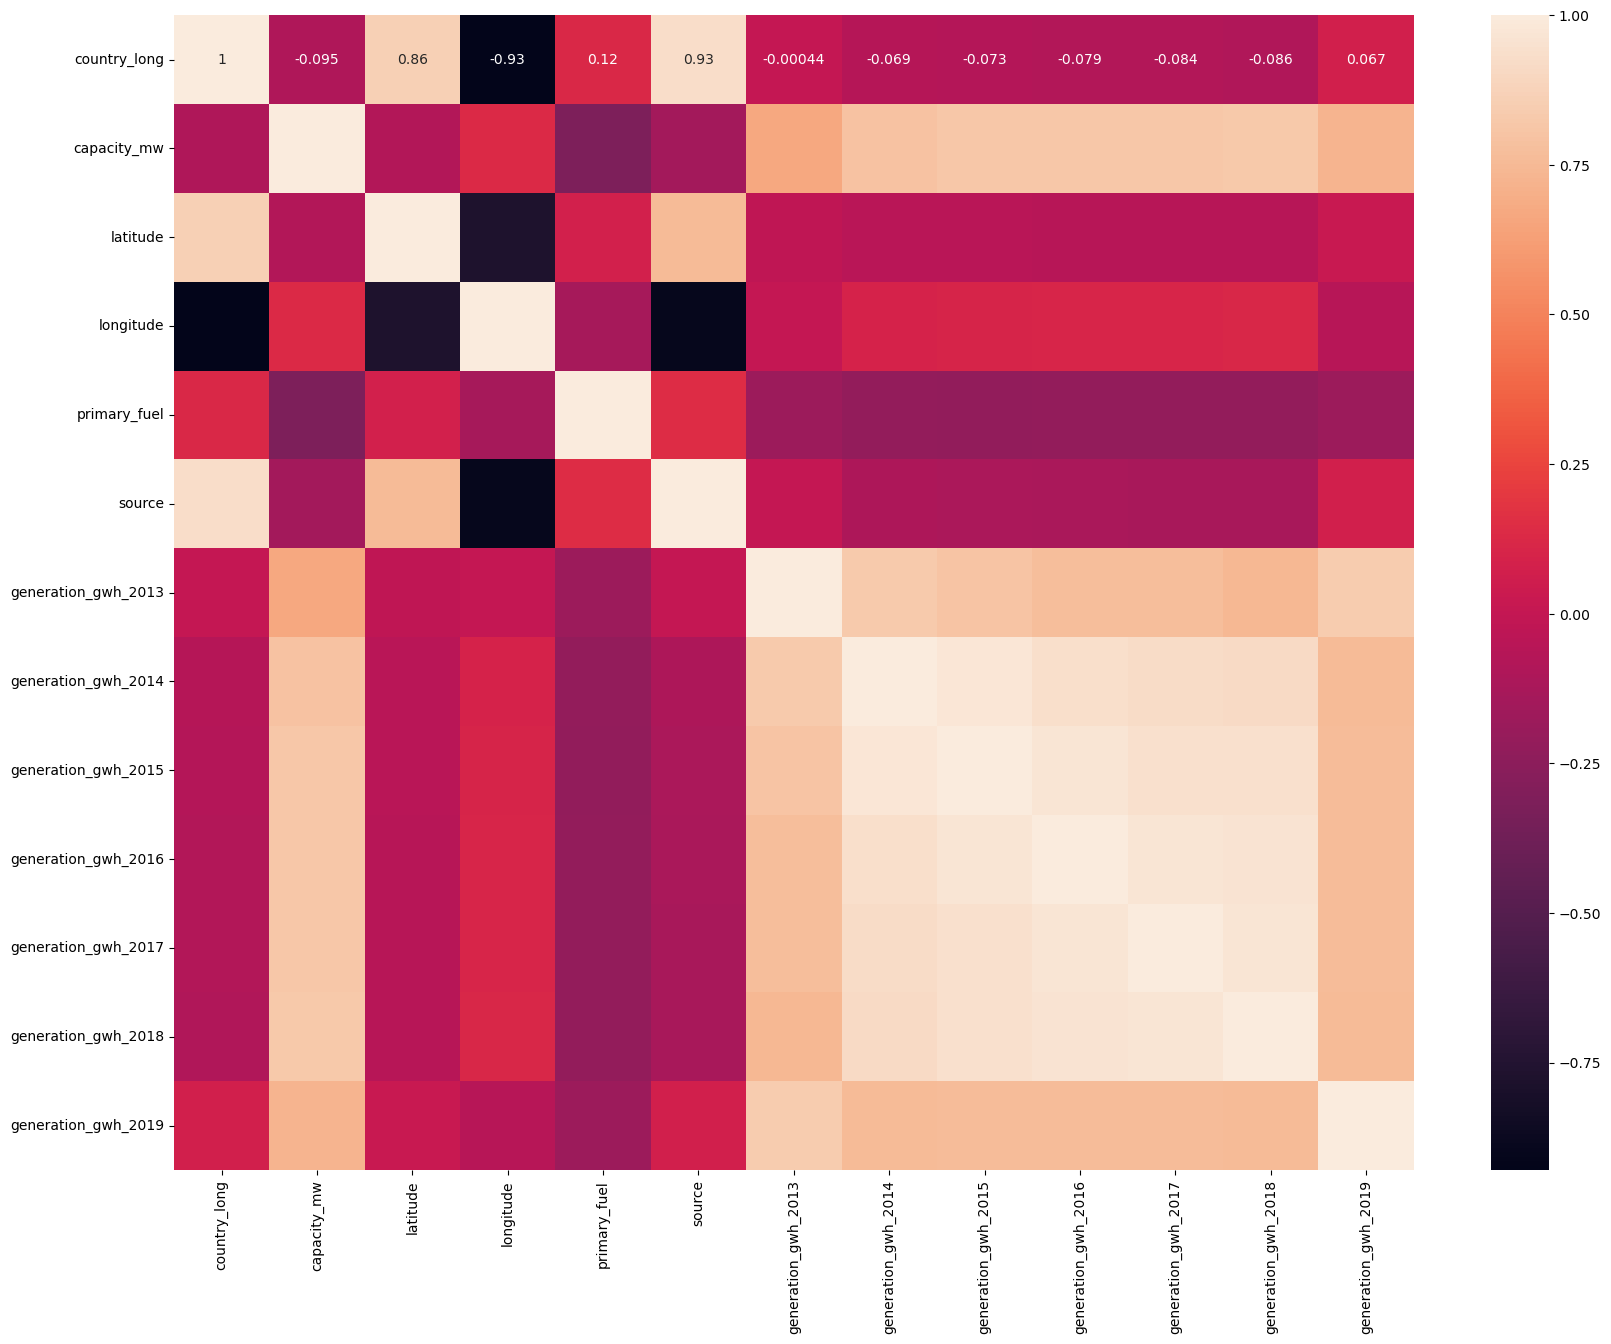

In [69]:
#Visualizing the correlation matrix by plotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr(),annot=True)

In [63]:
#Visualize outliers and dealing with them

<Axes: >

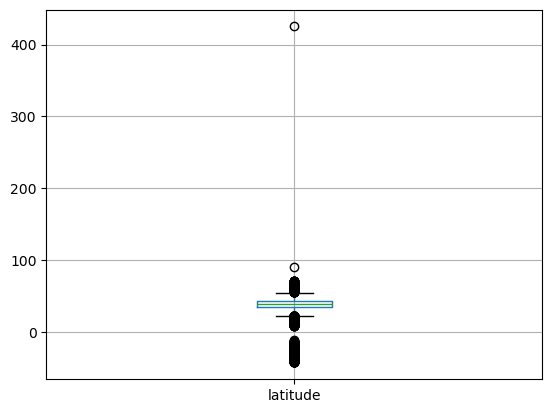

In [70]:
df.boxplot(column='latitude')

<Axes: >

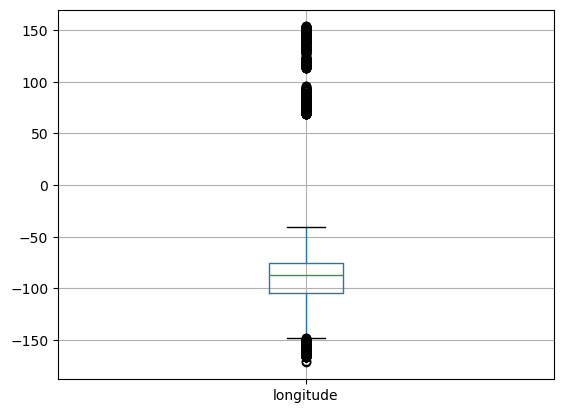

In [71]:
df.boxplot(column='longitude') 

<Axes: >

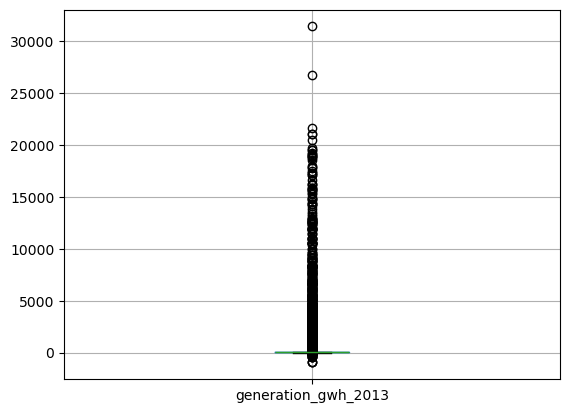

In [72]:
df.boxplot(column='generation_gwh_2013')

<Axes: >

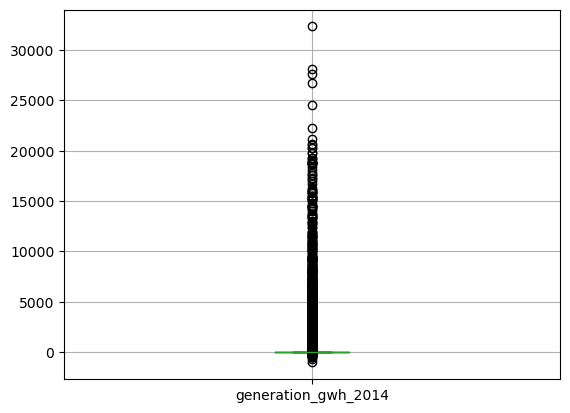

In [73]:
df.boxplot(column='generation_gwh_2014')

<Axes: >

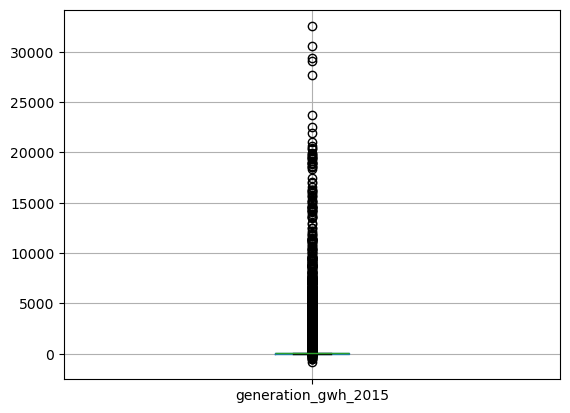

In [74]:
df.boxplot(column='generation_gwh_2015')

<Axes: >

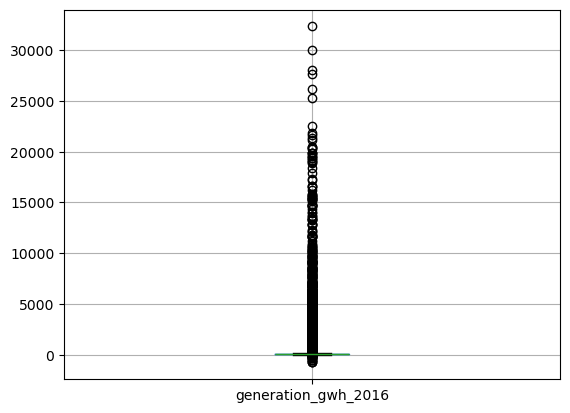

In [75]:
df.boxplot(column='generation_gwh_2016')

<Axes: >

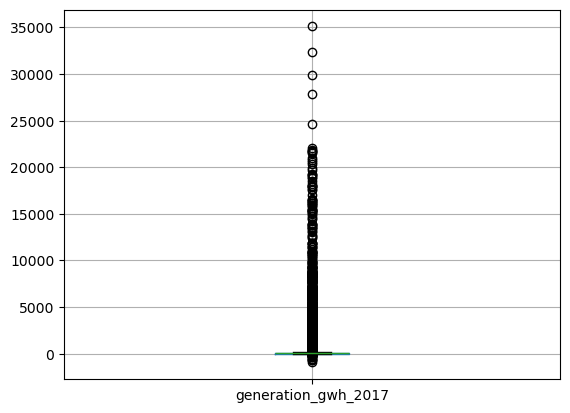

In [76]:
df.boxplot(column='generation_gwh_2017')

<Axes: >

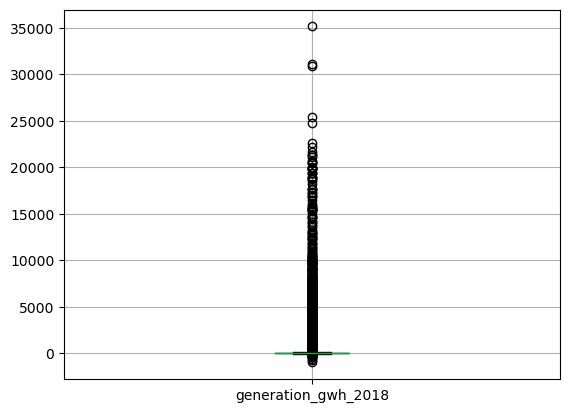

In [77]:
df.boxplot(column='generation_gwh_2018')

<Axes: >

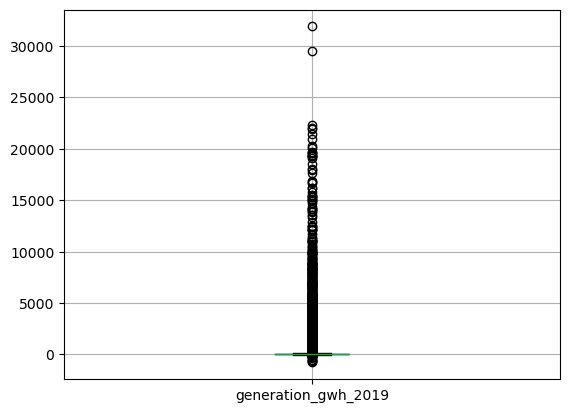

In [78]:
df.boxplot(column='generation_gwh_2019')

In [79]:
#Remove outliers using zscore method 
#'capacity_mw' the target variable is not subjected to outlier removal
from scipy.stats import zscore
out_features=df[['latitude', 'longitude', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018','generation_gwh_2019']]
z=np.abs(zscore(out_features))
z

latitude  longitude  generation_gwh_2013  generation_gwh_2014  \
0    4.546094   3.388263             0.192873             0.207084   
1    4.546523   3.389069             0.192873             0.207084   
2    4.554237   3.057431             0.147854             0.159181   
3    3.822598   3.314239             0.192873             0.207084   
4    4.520913   3.391903             0.192873             0.207084   
..        ...        ...                  ...                  ...   
902  1.219315   2.412341             0.192873             0.207084   
903  1.440199   2.425239             0.205716             0.207084   
904  1.285488   2.384016             0.205631             0.207084   
905  0.696268   2.354771             0.192873             0.207084   
906  1.632325   2.414255             0.192873             0.207084   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.212332             0.212961             0.214631   
1               0.212332             0.212961             0.214631   
2               0.166761             0.165029             0.171746   
3               0.212332             0.212961             0.214631   
4               0.212332             0.212961             0.214631   
..                   ...                  ...                  ...   
902             0.223278             0.082987             0.289556   
903             0.212332             0.212961             0.214631   
904             0.212332             0.212961             0.214631   
905             0.212332             0.212961             0.214631   
906             0.212332             0.212961             0.214631   

     generation_gwh_2018  generation_gwh_2019  
0               0.218033             0.206412  
1               0.218033             0.206412  
2               0.170884             0.206412  
3               0.218033             0.206412  
4               0.218033             0.206412  
..                   ...                  ...  
902             0.177465             0.206412  
903             0.218033             0.206412  
904             0.218033             0.206412  
905             0.218033             0.206412  
906             0.218033             0.206412  

[13298 rows x 9 columns]

In [80]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(12379, 13)

In [81]:
#shape of old and new dataframe
print("Original Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Original Data Frame- 13298
New Data Frame- 12379


In [82]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)
#there is a 6.9% data loss when using zscore to remove outliers

Data Loss Percentage- 6.910813656188901


In [132]:
df=df1.copy()
#I will make a copy of the dataframe  because I will need it for the second  target variable as per problem statement

In [84]:
df.shape

(12379, 13)

In [85]:
#Checking for Skewness
df.skew()
#Skeweness is acceptable only within the range of -0.5 and 0.5.On that basis,all the columns except primary_fuel fall short of that criteria

country_long          -3.523106
capacity_mw            4.832952
latitude              -0.751307
longitude              2.646439
primary_fuel          -0.232160
source                -3.845980
generation_gwh_2013    6.044379
generation_gwh_2014    5.701980
generation_gwh_2015    5.584567
generation_gwh_2016    5.676004
generation_gwh_2017    5.582012
generation_gwh_2018    5.402280
generation_gwh_2019    5.744970
dtype: float64

In [86]:
#Removing skeweness  using the cuberoot method
df.skew()

df['generation_gwh_2013']=np.cbrt(df['generation_gwh_2013'])

In [87]:
#check skewness after removing by cuberoot method
df.skew()
#the cuberoot method didn't successfully remove skeweness

country_long          -3.523106
capacity_mw            4.832952
latitude              -0.751307
longitude              2.646439
primary_fuel          -0.232160
source                -3.845980
generation_gwh_2013    2.094763
generation_gwh_2014    5.701980
generation_gwh_2015    5.584567
generation_gwh_2016    5.676004
generation_gwh_2017    5.582012
generation_gwh_2018    5.402280
generation_gwh_2019    5.744970
dtype: float64

In [88]:
#Removing skeweness in generation_gwh_2013 using log1p method
df["generation_gwh_2013"]=np.log1p(df["generation_gwh_2013"])

In [89]:
#check again
df.skew()
#the log1p method failed to remove skeweness 

country_long          -3.523106
capacity_mw            4.832952
latitude              -0.751307
longitude              2.646439
primary_fuel          -0.232160
source                -3.845980
generation_gwh_2013   -0.902874
generation_gwh_2014    5.701980
generation_gwh_2015    5.584567
generation_gwh_2016    5.676004
generation_gwh_2017    5.582012
generation_gwh_2018    5.402280
generation_gwh_2019    5.744970
dtype: float64

In [90]:
#removing skeweness using power transform
from sklearn.preprocessing import power_transform
df[['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']] =power_transform(df[['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']].values)

In [91]:
#check for skeweness again
df.skew()

country_long          -3.523106
capacity_mw            0.138177
latitude               0.274154
longitude              0.677740
primary_fuel          -0.232160
source                -3.845980
generation_gwh_2013    0.187453
generation_gwh_2014   -4.498727
generation_gwh_2015   -4.517625
generation_gwh_2016   -3.886175
generation_gwh_2017   -4.783278
generation_gwh_2018   -5.608309
generation_gwh_2019   -4.710291
dtype: float64

In [92]:
#skeweness has been removed from latitude,capacity_mw and primary_fuel

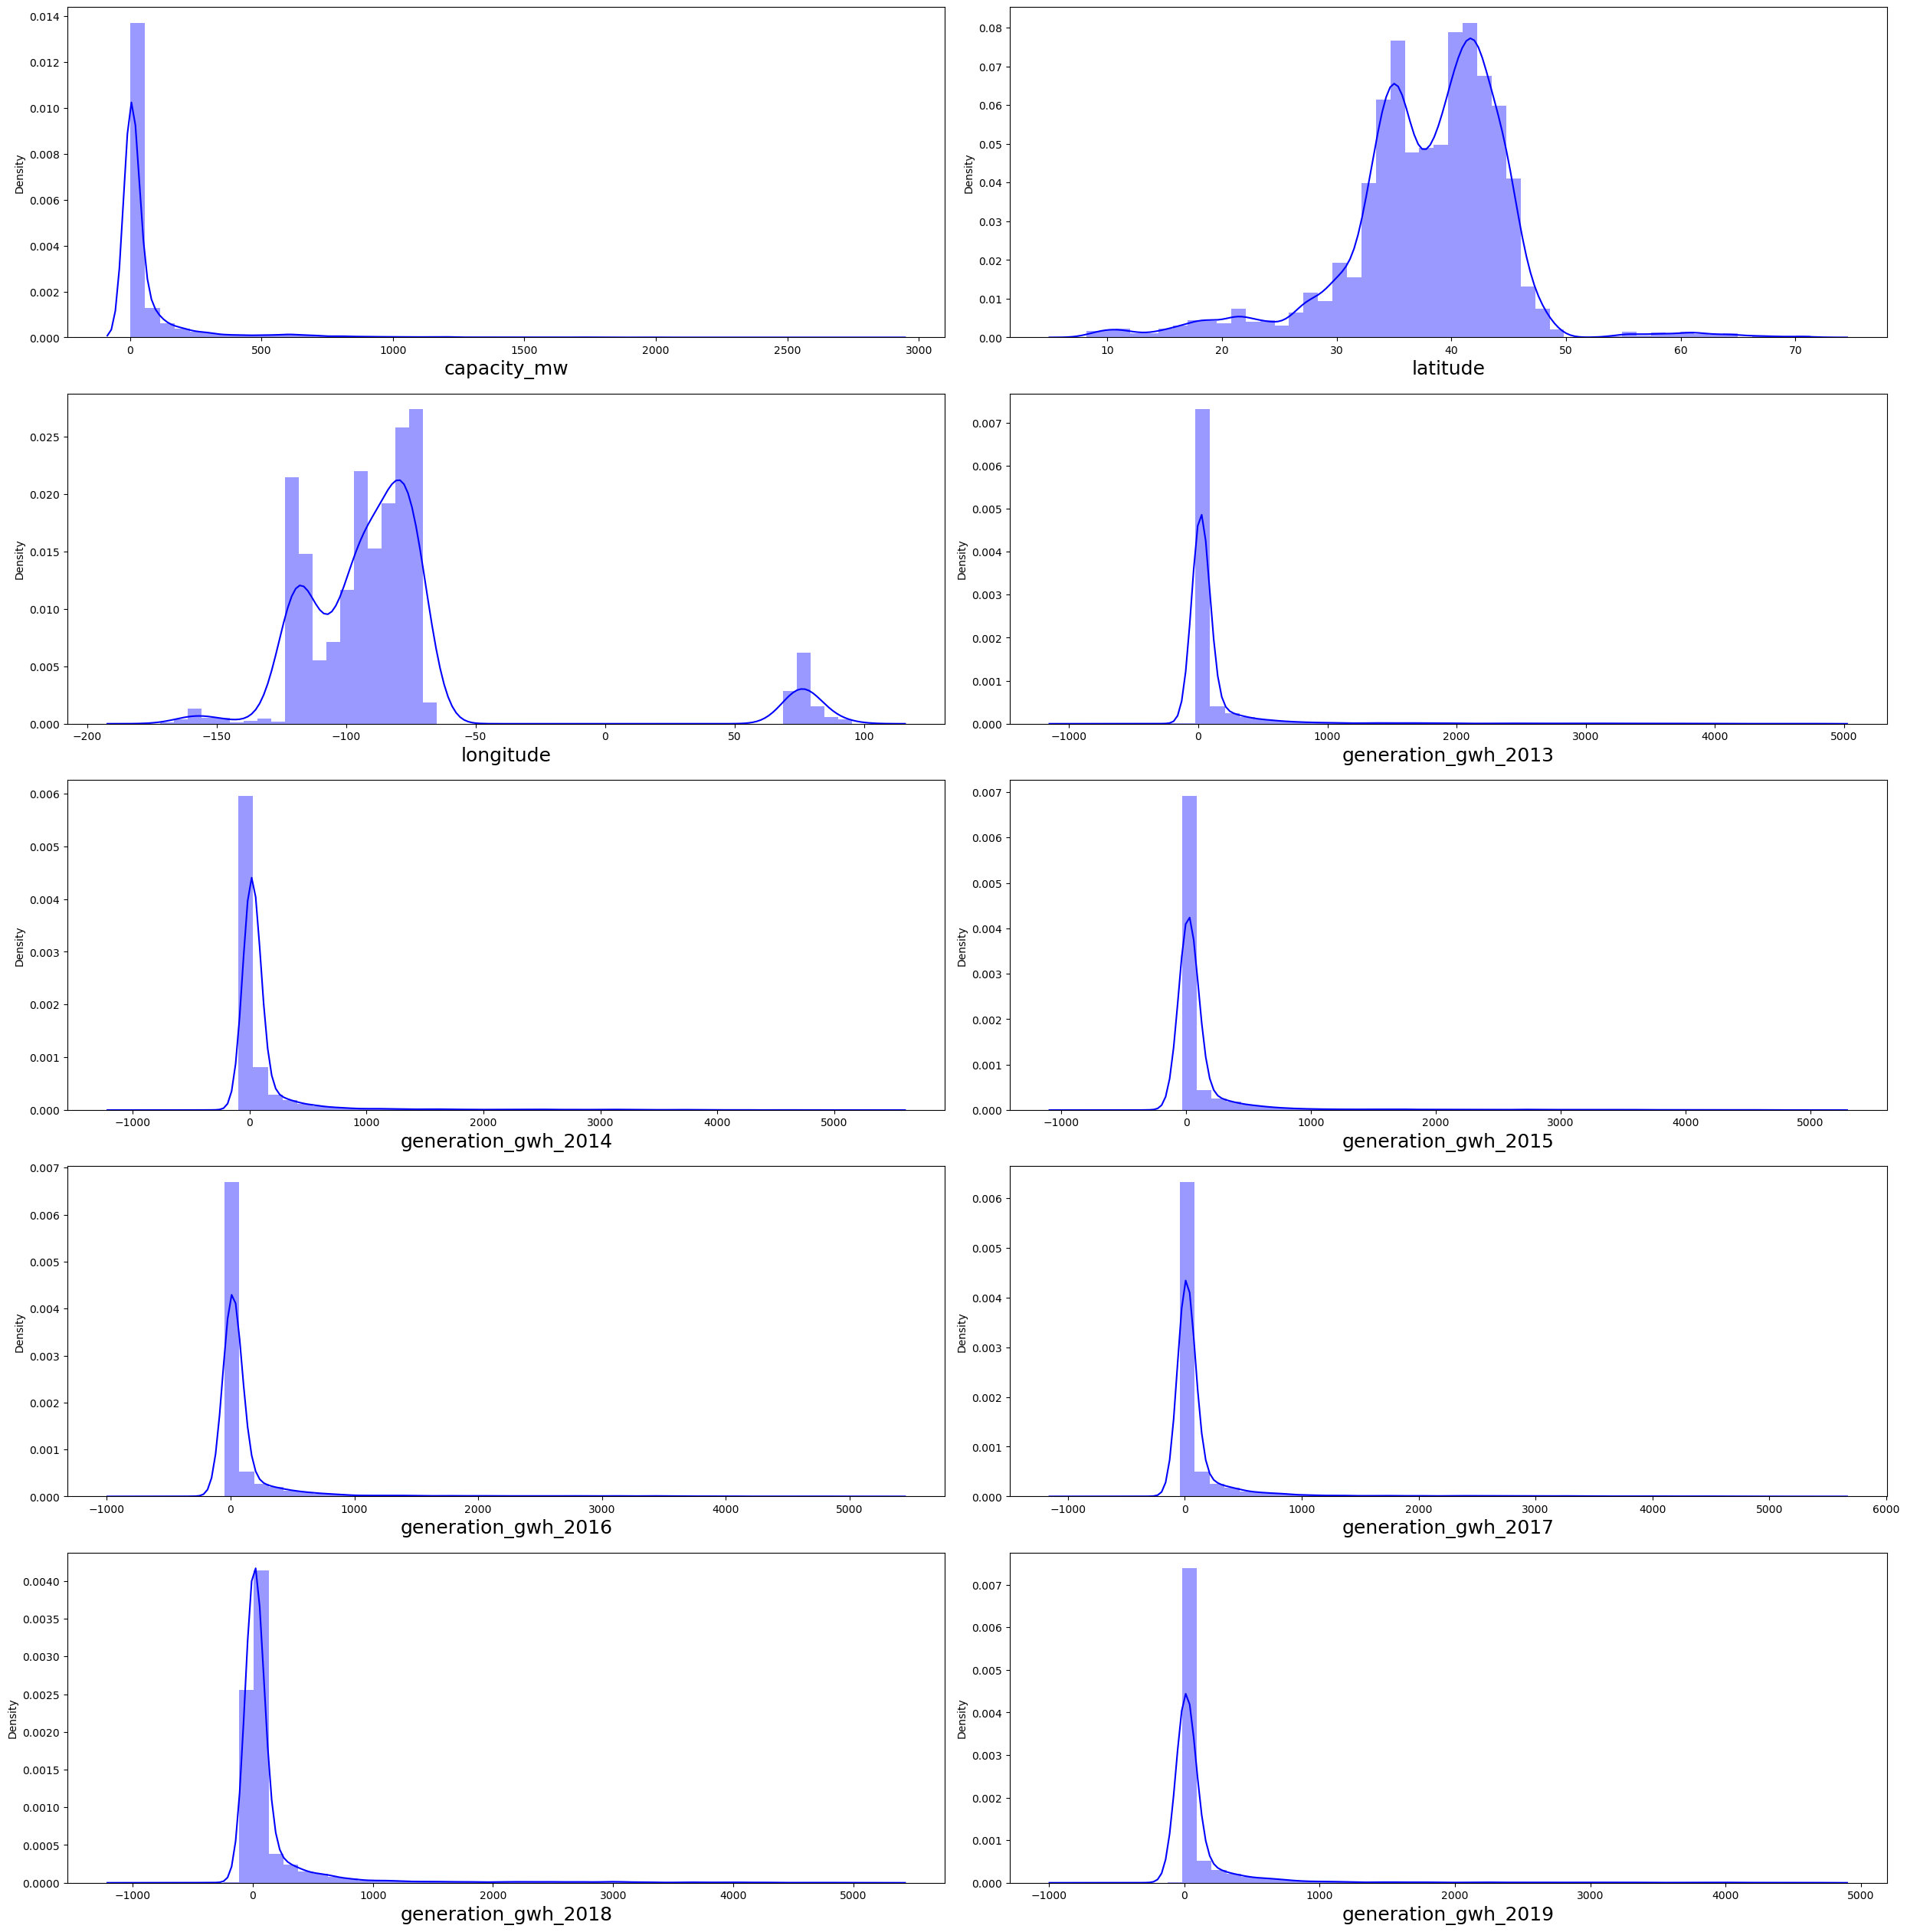

In [93]:
#checking distribution of data after attempting to remove skeweness
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=10:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()



In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels
#As per problem statement,I will  deal with the regression problem first.(capacity_mw)

In [94]:
#seperate the target and independent variables into x and y
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (12379, 12)
Label Dimension= (12379,)


In [95]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

country_long  latitude  longitude  primary_fuel    source  \
0          0.264078  0.512413   0.674038     -1.241832  0.252139   
1          0.264078  0.427125   0.586712      0.629424  0.252139   
2          0.264078 -0.297284   0.340725      0.629424  0.252139   
3          0.264078 -0.306933   0.351302      0.629424  0.252139   
4          0.264078 -0.316871   0.347536      0.629424  0.252139   
...             ...       ...        ...           ...       ...   
12374     -3.786757 -2.574996   2.769685     -1.776476 -4.193746   
12375     -3.786757 -2.833175   2.771201      0.629424 -2.564508   
12376     -3.786757 -2.656663   2.766338      1.431391 -4.248974   
12377     -3.786757 -1.806541   2.762854     -1.776476 -3.061564   
12378     -3.786757 -3.023133   2.769911      1.431391 -4.248974   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.022243            -0.217465            -0.223857   
1                 0.022243            -0.217465            -0.223857   
2                 0.022243            -0.217465            -0.223857   
3                 0.022243            -0.217465            -0.223857   
4                 0.022243            -0.217465            -0.223857   
...                    ...                  ...                  ...   
12374             0.022243            -0.217465            -0.322554   
12375            -0.874421            -0.217465            -0.223857   
12376            -0.855099            -0.217465            -0.223857   
12377             0.022243            -0.217465            -0.223857   
12378             0.022243            -0.217465            -0.223857   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                -0.234496            -0.246001            -0.256439   
1                -0.234496            -0.246001            -0.256439   
2                -0.234496            -0.246001            -0.256439   
3                -0.234496            -0.246001            -0.256439   
4                -0.234496            -0.246001            -0.256439   
...                    ...                  ...                  ...   
12374             0.385311             1.599409             1.247841   
12375            -0.234496            -0.246001            -0.256439   
12376            -0.234496            -0.246001            -0.256439   
12377            -0.234496            -0.246001            -0.256439   
12378            -0.234496            -0.246001            -0.256439   

       generation_gwh_2019  
0                -0.257688  
1                -0.308288  
2                -0.257688  
3                -0.257688  
4                -0.257688  
...                    ...  
12374            -0.257688  
12375            -0.257688  
12376            -0.257688  
12377            -0.257688  
12378            -0.257688  

[12379 rows x 12 columns]

In [96]:
#checking for null values after scaling
x.isnull().sum()

country_long            0
latitude                0
longitude               0
primary_fuel            0
source                  0
generation_gwh_2013    34
generation_gwh_2014     0
generation_gwh_2015     0
generation_gwh_2016     0
generation_gwh_2017     0
generation_gwh_2018     0
generation_gwh_2019     0
dtype: int64

In [97]:
x[['generation_gwh_2013']] = x[['generation_gwh_2013']].fillna(x[['generation_gwh_2013']].median())

In [98]:
x

country_long  latitude  longitude  primary_fuel    source  \
0          0.264078  0.512413   0.674038     -1.241832  0.252139   
1          0.264078  0.427125   0.586712      0.629424  0.252139   
2          0.264078 -0.297284   0.340725      0.629424  0.252139   
3          0.264078 -0.306933   0.351302      0.629424  0.252139   
4          0.264078 -0.316871   0.347536      0.629424  0.252139   
...             ...       ...        ...           ...       ...   
12374     -3.786757 -2.574996   2.769685     -1.776476 -4.193746   
12375     -3.786757 -2.833175   2.771201      0.629424 -2.564508   
12376     -3.786757 -2.656663   2.766338      1.431391 -4.248974   
12377     -3.786757 -1.806541   2.762854     -1.776476 -3.061564   
12378     -3.786757 -3.023133   2.769911      1.431391 -4.248974   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 0.022243            -0.217465            -0.223857   
1                 0.022243            -0.217465            -0.223857   
2                 0.022243            -0.217465            -0.223857   
3                 0.022243            -0.217465            -0.223857   
4                 0.022243            -0.217465            -0.223857   
...                    ...                  ...                  ...   
12374             0.022243            -0.217465            -0.322554   
12375            -0.874421            -0.217465            -0.223857   
12376            -0.855099            -0.217465            -0.223857   
12377             0.022243            -0.217465            -0.223857   
12378             0.022243            -0.217465            -0.223857   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                -0.234496            -0.246001            -0.256439   
1                -0.234496            -0.246001            -0.256439   
2                -0.234496            -0.246001            -0.256439   
3                -0.234496            -0.246001            -0.256439   
4                -0.234496            -0.246001            -0.256439   
...                    ...                  ...                  ...   
12374             0.385311             1.599409             1.247841   
12375            -0.234496            -0.246001            -0.256439   
12376            -0.234496            -0.246001            -0.256439   
12377            -0.234496            -0.246001            -0.256439   
12378            -0.234496            -0.246001            -0.256439   

       generation_gwh_2019  
0                -0.257688  
1                -0.308288  
2                -0.257688  
3                -0.257688  
4                -0.257688  
...                    ...  
12374            -0.257688  
12375            -0.257688  
12376            -0.257688  
12377            -0.257688  
12378            -0.257688  

[12379 rows x 12 columns]

In [99]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values             Features
0     7.441977         country_long
1     1.390501             latitude
2     1.948026            longitude
3     1.059173         primary_fuel
4     6.596824               source
5     1.322439  generation_gwh_2013
6     8.171099  generation_gwh_2014
7    13.628730  generation_gwh_2015
8    14.645674  generation_gwh_2016
9    16.539196  generation_gwh_2017
10   11.429076  generation_gwh_2018
11    3.845366  generation_gwh_2019

In [100]:
#Droping generation_gwh_2017 because it has the highest VIF
x = x.drop(["generation_gwh_2017"],axis=1)

In [101]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2)) again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values             Features
0     7.440070         country_long
1     1.390224             latitude
2     1.945181            longitude
3     1.057176         primary_fuel
4     6.592314               source
5     1.317922  generation_gwh_2013
6     8.146046  generation_gwh_2014
7    13.515239  generation_gwh_2015
8    11.781807  generation_gwh_2016
9     8.403417  generation_gwh_2018
10    3.814882  generation_gwh_2019

In [102]:
#Droping generation_gwh_2015 because it has the highest VIF
x = x.drop(["generation_gwh_2015"],axis=1)

In [103]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2)) again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values             Features
0    7.439432         country_long
1    1.390217             latitude
2    1.944129            longitude
3    1.056236         primary_fuel
4    6.591373               source
5    1.317921  generation_gwh_2013
6    5.081955  generation_gwh_2014
7    9.131137  generation_gwh_2016
8    8.402302  generation_gwh_2018
9    3.740835  generation_gwh_2019

In [104]:
x.head()#checking the if the columns have been removed

country_long  latitude  longitude  primary_fuel    source  \
0      0.264078  0.512413   0.674038     -1.241832  0.252139   
1      0.264078  0.427125   0.586712      0.629424  0.252139   
2      0.264078 -0.297284   0.340725      0.629424  0.252139   
3      0.264078 -0.306933   0.351302      0.629424  0.252139   
4      0.264078 -0.316871   0.347536      0.629424  0.252139   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2016  \
0             0.022243            -0.217465            -0.234496   
1             0.022243            -0.217465            -0.234496   
2             0.022243            -0.217465            -0.234496   
3             0.022243            -0.217465            -0.234496   
4             0.022243            -0.217465            -0.234496   

   generation_gwh_2018  generation_gwh_2019  
0            -0.256439            -0.257688  
1            -0.256439            -0.308288  
2            -0.256439            -0.257688  
3            -0.256439            -0.257688  
4            -0.256439            -0.257688

In [ ]:
Multicollinearity has been eliminated,we can proceed with model building

In [105]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [106]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.3198451766753272 at random_state 164


In [107]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [108]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.2571522862185628
R2_score on training data: 28.773624046380498
Mean Absolute Error:- 0.6640874398817951
Mean Squared Error:- 0.734519917596486
Root Mean Squared Error:- 0.8570413744951209


In [109]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8731736567222801
R2_score on training data: 98.38258044608925
Mean Absolute Error:- 0.18669551650805977
Mean Squared Error:- 0.12540453916079927
Root Mean Squared Error:- 0.3541250332309187


In [110]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.6816854215044085
R2_score on training data: 81.21785212597173
Mean Absolute Error:- 0.34381084897652725
Mean Squared Error:- 0.3147460692530769
Root Mean Squared Error:- 0.5610223429178886


In [111]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8388679021676507
R2_score on training data: 86.34789602461555
Mean Absolute Error:- 0.2580089610134563
Mean Squared Error:- 0.1593257043485884
Root Mean Squared Error:- 0.39915624052316706


In [112]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -0.0004713650171583872
R2_score on training data: 0.0
Mean Absolute Error:- 0.8453829503547019
Mean Squared Error:- 0.989255443554157
Root Mean Squared Error:- 0.9946132130402033


In [113]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.25720612821946087
R2_score on training data: 28.773620937362033
Mean Absolute Error:- 0.6640897241186786
Mean Squared Error:- 0.734466679198724
Root Mean Squared Error:- 0.8570103145229491


In [114]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.7588581509614631
R2_score on training data: 99.96919922097453
Mean Absolute Error:- 0.24183943719658776
Mean Squared Error:- 0.23843849526467567
Root Mean Squared Error:- 0.4883016437251422


In [115]:
#Cross validation Score-to compare and select an appropriate model for the predictive modelling problem.It prevents overfitting
from sklearn.model_selection import cross_val_score

In [116]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.19353464 0.28171474 0.23175267 0.20857197 0.22928346]
0.2289714947968772
Difference between R2 score and cross validation score is - 2.8180791421685587


In [117]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.87829352 0.86890982 0.87382964 0.8885179  0.7396334 ]
0.8498368562151782
Difference between R2 score and cross validation score is - 2.333680050710185


In [118]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_knn)-score.mean())*100)

[0.68353213 0.67261359 0.67905155 0.68204972 0.60304586]
0.6640585705443109
Difference between R2 score and cross validation score is - 1.7626850960097529


In [119]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.84632508 0.8398684  0.83803993 0.85987946 0.75047083]
0.826916741097747
Difference between R2 score and cross validation score is - 1.1951161069903682


In [120]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_lasso)-score.mean())*100)

[-0.00248959 -0.00318586 -0.00192931 -0.00675943 -0.05364657]
-0.013602151441535782
Difference between R2 score and cross validation score is - 1.3130786424377394


In [121]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[0.1935535  0.28170955 0.23174181 0.20856431 0.22890203]
0.2288942422646949
Difference between R2 score and cross validation score is - 0.02831188595476597


In [122]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.76794314 0.72544131 0.78163062 0.78846726 0.48255144]
0.7092067520334074
Difference between R2 score and cross validation score is - 4.9651398928055706


In [ ]:
#RandomForestRegressor model is the best because it has a 1.19  difference between R2 score and cross validation score 
and the highest R2 score of 83% on test data.

In [125]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'], 
              'learning_rate' : [0.1, 0.5, 0.9],
              'subsample' : [0.1, 0.3, .05, 1.0], 
              'n_estimators': [50, 100, 200, 300, 400],
              'criterion':['friedman_mse', 'squared_error']}

GVC=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'loss':'squared_error','learning_rate':0.1,'subsample':1.0,'n_estimators':100,'criterion':'friedman_mse'}

Final_model=GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,subsample=1.0,n_estimators=10,criterion='friedman_mse')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.6360108814462556
Mean Absolute Error:- 0.4911916973938543
Mean Squared Error:- 0.35990856861515025
Root Mean Squared Error:- 0.5999238023408892


In [127]:
#Saving the model
import joblib
joblib.dump(Final_model,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [128]:
#Loading the saved model to get predictions
model=joblib.load("Global_Power_Plant_capacity_mw.pkl")

In [129]:
#Prediction
prediction=model.predict(x_test)
prediction

array([-0.28961696,  0.33611468,  0.84512672, ..., -0.28961696,
        0.75083498,  0.66663507])

In [130]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

Predicted  Original
0     -0.289617 -0.900272
1      0.336115  0.781645
2      0.845127  0.981965
3      0.283162 -0.197063
4     -0.289617 -0.900272
...         ...       ...
3709  -0.289617 -0.601938
3710  -0.672617 -1.467217
3711  -0.289617 -0.142711
3712   0.750835  0.950193
3713   0.666635  1.368522

[3714 rows x 2 columns]

In [ ]:
#Second part of the solution is a classification Model as prescribed

In [133]:
#fetching my clean data frame saved earlier
df

country_long  capacity_mw  latitude  longitude  primary_fuel  source  \
0               2          0.0   41.6327   -71.4963             3     185   
1               2          2.0   41.0930   -73.9828            10     185   
2               2          0.0   36.2838   -80.8434            10     185   
3               2          0.0   36.2167   -80.5525            10     185   
4               2          0.0   36.1475   -80.6561            10     185   
..            ...          ...       ...        ...           ...     ...   
902             1       1600.0   16.2949    77.3568             1      24   
903             1          3.0   12.8932    78.1654            10      83   
904             1         25.5   15.2758    75.5811            13      22   
905             1         80.0   24.3500    73.7477             1      65   
906             1         16.5    9.9344    77.4768            13      22   

     generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                21.3845               22.241            19.504000   
1                21.3845               22.241            19.504000   
2                21.3845               22.241            19.504000   
3                21.3845               22.241            19.504000   
4                21.3845               22.241            19.504000   
..                   ...                  ...                  ...   
902              21.3845               22.241             0.994875   
903               1.9250               22.241            19.504000   
904               2.0540               22.241            19.504000   
905              21.3845               22.241            19.504000   
906              21.3845               22.241            19.504000   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0              15.410278            13.433861              12.3085   
1              15.410278            13.433861              12.3085   
2              15.410278            13.433861              12.3085   
3              15.410278            13.433861              12.3085   
4              15.410278            13.433861              12.3085   
..                   ...                  ...                  ...   
902           233.596650           865.400000             686.5000   
903            15.410278            13.433861              12.3085   
904            15.410278            13.433861              12.3085   
905            15.410278            13.433861              12.3085   
906            15.410278            13.433861              12.3085   

     generation_gwh_2019  
0               11.28013  
1                2.46700  
2               11.28013  
3               11.28013  
4               11.28013  
..                   ...  
902             11.28013  
903             11.28013  
904             11.28013  
905             11.28013  
906             11.28013  

[12379 rows x 13 columns]

In [134]:
#check VIF
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif
#there is no multicollinearity

VIF values             Features
0    7.439432         country_long
1    1.390217             latitude
2    1.944129            longitude
3    1.056236         primary_fuel
4    6.591373               source
5    1.317921  generation_gwh_2013
6    5.081955  generation_gwh_2014
7    9.131137  generation_gwh_2016
8    8.402302  generation_gwh_2018
9    3.740835  generation_gwh_2019

In [135]:
#seperate the target and independent variables into x and y
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (12379, 12)
Label Dimension= (12379,)


In [136]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

country_long  capacity_mw  latitude  longitude    source  \
0          0.264078    -0.377429  0.537568   0.270743  0.252139   
1          0.264078    -0.366806  0.461272   0.215437  0.252139   
2          0.264078    -0.377429 -0.218590   0.062841  0.252139   
3          0.264078    -0.377429 -0.228075   0.069311  0.252139   
4          0.264078    -0.377429 -0.237858   0.067007  0.252139   
...             ...          ...       ...        ...       ...   
12374     -3.786757     8.120902 -3.044360   3.581586 -4.193746   
12375     -3.786757    -0.361495 -3.525248   3.599571 -2.564508   
12376     -3.786757    -0.241987 -3.188427   3.542090 -4.248974   
12377     -3.786757     0.047487 -1.905635   3.501311 -3.061564   
12378     -3.786757    -0.289790 -3.943524   3.584255 -4.248974   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                -0.238396             -0.25035            -0.255294   
1                -0.238396             -0.25035            -0.255294   
2                -0.238396             -0.25035            -0.255294   
3                -0.238396             -0.25035            -0.255294   
4                -0.238396             -0.25035            -0.255294   
...                    ...                  ...                  ...   
12374            -0.238396             -0.25035            -0.291625   
12375            -0.281539             -0.25035            -0.255294   
12376            -0.281253             -0.25035            -0.255294   
12377            -0.238396             -0.25035            -0.255294   
12378            -0.238396             -0.25035            -0.255294   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                -0.263858            -0.272308            -0.280946   
1                -0.263858            -0.272308            -0.280946   
2                -0.263858            -0.272308            -0.280946   
3                -0.263858            -0.272308            -0.280946   
4                -0.263858            -0.272308            -0.280946   
...                    ...                  ...                  ...   
12374             0.174193             1.472977             1.058871   
12375            -0.263858            -0.272308            -0.280946   
12376            -0.263858            -0.272308            -0.280946   
12377            -0.263858            -0.272308            -0.280946   
12378            -0.263858            -0.272308            -0.280946   

       generation_gwh_2019  
0                -0.275791  
1                -0.294374  
2                -0.275791  
3                -0.275791  
4                -0.275791  
...                    ...  
12374            -0.275791  
12375            -0.275791  
12376            -0.275791  
12377            -0.275791  
12378            -0.275791  

[12379 rows x 12 columns]

In [140]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.7256327409800754 at random_state 139


In [141]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [142]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [143]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7207862143241788
[[  19    2    0    7    0   18    0    2    0    1    8    0    5    4]
 [   5   44    0   35    1   11    0    4    0    0   11    0    2    9]
 [   0    0    1    5    0    2    0    0    0    0    1    1    0    0]
 [   4    7    1  406    1   53    1   47    0    0   61    2   20   29]
 [   0    0    0    3    9    2    0    1    0    0    1    0    1    2]
 [   0   10    0   41    1  454    1    6    0    0   61    1   16   23]
 [   0    1    0    1    0    0    0    1    0    0    2    0    0    0]
 [   1    1    0   44    0   13    0  235    0    0   34    0    0    7]
 [   0    0    0    5    0    4    0    0    0    0    1    0    0    0]
 [   0    0    0    3    0    0    0    0    0    0    1    0    0    0]
 [   1   10    1   40    0   40    0   16    0    0 1102    2    7   22]
 [   0    0    0    5    0    1    0    0    0    0    9   20    0    0]
 [   2    3    0   34    1   47    0    5    0    0   19    0   72    6]
 [   0    1    1   27    0   29 

In [144]:
#checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.6270866989768443
[[  16    2    0    7    0   10    1    3    0    0   14    0    7    6]
 [   7   42    0   27    0    5    0    6    0    0   17    0    1   17]
 [   0    1    0    4    0    2    0    1    0    0    0    0    0    2]
 [  18   25    0  331    2   44    0   53    0    0   96    0   11   52]
 [   0    0    0    4    7    2    0    0    0    0    2    0    2    2]
 [   5   16    1   53    3  385    0   16    0    0   84    0   16   35]
 [   0    1    0    2    0    0    0    0    0    0    2    0    0    0]
 [   1    3    1   54    0   19    0  197    0    0   54    0    0    6]
 [   0    0    0    3    0    3    0    0    0    0    2    0    0    2]
 [   0    0    0    4    0    0    0    0    0    0    0    0    0    0]
 [  10    9    0   65    2   59    0   22    0    0 1025    0    8   41]
 [   1    0    0    8    0    3    0    1    0    0   19    2    0    1]
 [   4    6    0   34    2   49    0    9    0    0   35    0   38   12]
 [   2    4    0   31    0   35 

In [145]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.4375336564351104
[[   0    0    0   11    0    8    0    0    0    0   47    0    0    0]
 [   0   16    0   37    0   28    0    1    0    0   39    0    0    1]
 [   0    0    0    0    0    2    0    0    0    0    8    0    0    0]
 [   1    8    0  248    0   35    0    3    0    0  322    0    0   15]
 [   0    0    0    5    0    1    0    0    0    0   13    0    0    0]
 [   0    9    0   39    0  125    0    7    0    0  420    0    1   13]
 [   0    0    0    1    0    0    0    0    0    0    4    0    0    0]
 [   0    0    0   11    0   14    0   25    0    0  285    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    9    0    0    0]
 [   0    0    0    2    0    1    0    0    0    0    1    0    0    0]
 [   0    3    0   32    0   11    2    0    0    0 1189    0    0    4]
 [   0    0    0    0    0    2    0    0    0    0   33    0    0    0]
 [   0    0    0   14    0   19    0    1    0    0  155    0    0    0]
 [   0    0    0  136    0  100 

In [146]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.48815293484114164
[[   1    0    0    3    0    5    0    0    0    0   47    0    0   10]
 [   0   23    0   31    0   11    0    2    0    0   40    0    0   15]
 [   0    0    0    0    0    2    0    0    0    0    8    0    0    0]
 [   1    5    0  232    0   27    0    5    0    0  316    0    0   46]
 [   0    0    0    0    0    3    0    0    0    0   11    0    0    5]
 [   0    5    0   23    0  128    0    6    0    0  401    0    0   51]
 [   0    0    0    1    0    0    0    0    0    0    4    0    0    0]
 [   0    0    0   19    0    5    0   25    0    0  283    0    0    3]
 [   0    0    0    0    0    1    0    0    0    0    8    0    0    1]
 [   0    0    0    1    0    0    0    0    0    0    2    0    0    1]
 [   0    0    0   22    0    3    0    0    0    0 1197    0    0   19]
 [   0    0    0    1    0    0    0    0    0    0   34    0    0    0]
 [   0    0    0    6    0   30    0    0    0    0  143    0    0   10]
 [   0    0    0   23    0   27

In [147]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.68578352180937
[[  12    1    0    7    0   20    0    1    0    0   15    0    5    5]
 [   4   40    0   30    0   10    2    5    0    0   23    0    2    6]
 [   0    2    0    4    0    1    0    0    0    0    2    1    0    0]
 [   9   11    0  339    4   45    2   48    2    1  125    0   18   28]
 [   0    0    0    2    9    4    0    0    0    0    2    0    0    2]
 [   0   12    2   37    1  401    1    6    1    0  113    0   13   27]
 [   0    1    0    0    0    0    0    0    0    0    4    0    0    0]
 [   0    1    0   35    1    5    1  222    2    0   66    0    0    2]
 [   0    0    0    3    0    2    0    0    0    0    3    0    1    1]
 [   0    0    0    2    0    0    0    0    0    0    1    0    0    1]
 [   4    3    1   15    1   24    1    2    0    0 1169    7    0   14]
 [   0    0    0    3    0    1    0    0    0    0   18   13    0    0]
 [   2    0    1   19    0   51    0    2    0    0   40    0   63   11]
 [   0    3    3   22    0   36   

In [149]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.4098007539041465
[[   0    0    0   18    0    0    0    4    1    7   35    0    1    0]
 [   0    0    0   65    0    1    0    4    2   19   30    0    0    1]
 [   0    0    0    2    0    0    0    1    1    5    1    0    0    0]
 [   0    0    0  247    0    3    0   46   36  115  183    0    0    2]
 [   0    0    0   12    0    0    0    2    0    0    5    0    0    0]
 [   0    0    0  176    0    8    0   21    4   42  360    2    1    0]
 [   0    0    0    1    0    0    0    0    0    0    4    0    0    0]
 [   0    0    0   38    0    2    0  189    1    9   96    0    0    0]
 [   0    0    0    2    0    0    0    0    3    2    3    0    0    0]
 [   0    0    0    0    0    0    0    0    1    2    1    0    0    0]
 [   0    0    0   84    0    1    0   67    9    8 1070    0    2    0]
 [   0    0    0    1    0    0    0   15    0    1   15    3    0    0]
 [   0    0    0   24    0    1    0    9    8   28  119    0    0    0]
 [   0    0    0  247    0    1 

In [150]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.6809369951534734
[[  19    3    0    8    0   21    0    1    0    1    7    0    5    1]
 [   7   44    1   28    0   13    0    7    0    0   13    0    2    7]
 [   0    0    1    4    0    2    0    0    0    0    1    1    1    0]
 [   7   21    6  396    2   43    1   44    1    0   51    2   28   30]
 [   1    1    0    2    7    3    0    1    0    0    1    0    2    1]
 [   4   12    1   70    2  410    0    9    0    0   49    1   28   28]
 [   0    0    0    0    0    1    0    1    0    0    2    0    0    1]
 [   3    2    0   59    0   15    0  214    0    0   32    0    3    7]
 [   0    0    0    5    0    3    0    0    0    0    2    0    0    0]
 [   0    0    0    2    0    0    0    0    0    0    1    0    1    0]
 [   2   12    3   51    0   52    1   17    0    0 1061    5   12   25]
 [   1    0    0    2    0    0    0    0    0    0   10   20    1    1]
 [   4    1    0   36    2   45    0    3    0    0   18    1   67   12]
 [   2    4    1   43    0   37 

In [151]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7226709746903608
[[  20    3    0    5    0   13    0    0    0    1   13    0    6    5]
 [   2   53    0   31    0    6    0    4    0    0   12    0    3   11]
 [   0    0    1    4    0    0    0    0    0    0    2    0    1    2]
 [   5   11    1  405    1   46    1   41    0    0   65    1   20   35]
 [   0    0    0    1   10    2    0    0    0    0    2    0    2    2]
 [   1    7    0   36    2  451    1    6    0    0   63    0   19   28]
 [   0    1    0    1    0    0    0    0    0    0    2    0    1    0]
 [   0    2    0   46    0    5    0  237    0    0   36    0    1    8]
 [   0    0    0    3    0    3    0    0    0    0    3    0    0    1]
 [   0    0    0    3    0    0    0    0    0    0    1    0    0    0]
 [   2   11    1   34    0   32    0   19    0    0 1103    3   11   25]
 [   0    0    0    4    0    1    0    2    0    0   13   14    1    0]
 [   2    2    0   36    1   43    0    4    0    0   22    1   70    8]
 [   0    2    1   23    0   21 

In [152]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [153]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.68295638 0.6825525  0.69709208 0.68659128 0.53010101]
0.6558586511316721
Difference between Accuracy score and cross validation score is - 0.0649275631925067


In [154]:
#Checking CV score for KNeighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.58602585 0.60016155 0.62075929 0.58844911 0.46949495]
0.5729781498343696
Difference between Accuracy score and cross validation score is - 0.05410854914247476


In [127]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.45516963 0.46163166 0.45072698 0.44426494 0.40888889]
0.4441364207503142
Difference between Accuracy score and cross validation score is - 0.03566971818344994


In [156]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.46930533 0.47253635 0.48344103 0.48061389 0.40242424]
0.4616641699711167
Difference between Accuracy score and cross validation score is - 0.02648876487002494


In [157]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.67003231 0.65912763 0.65630048 0.66720517 0.53979798]
0.6384927138917446
Difference between Accuracy score and cross validation score is - 0.04729080791762541


In [158]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.27827141 0.22819063 0.37843296 0.37318255 0.33414141]
0.31844379171358167
Difference between Accuracy score and cross validation score is - 0.09135696219056483


In [159]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.66639742 0.66074313 0.66882068 0.6720517  0.51313131]
0.636228847440479
Difference between Accuracy score and cross validation score is - 0.04470814771299436


In [139]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.68497577 0.68739903 0.69345719 0.69588045 0.52848485]
0.658039457580653
Difference between Accuracy score and cross validation score is - 0.06436226562882463


In [ ]:
#Model selected

I chose RandomForestClassifier.It has an accuracy of  72% and the least  difference between Accuracy and cross validation score compared to 0.06

In [167]:
#Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
parameters={'criterion' : ['gini', 'entropy'], 
              'min_samples_leaf' : [1, 5, 10,],
              'min_samples_split' : [2, 4, 8], 
              'n_estimators': [10, 20, 25],
              'max_features':['sqrt','log2', None]}

random_cv=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=5)
model=RandomForestClassifier()
random_cv=RandomizedSearchCV(estimator=model,
                             param_distributions=parameters,
                             cv=5,
                             n_iter=10,
                             scoring='accuracy',
                             verbose=5,
                             return_train_score=True)
random_cv.fit(x_train,y_train)

Final_model=RandomForestClassifier()
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=(train=0.884, test=0.658) total time=   1.3s
[CV 2/5] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=(train=0.887, test=0.669) total time=   0.7s
[CV 3/5] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=(train=0.890, test=0.685) total time=   0.7s
[CV 4/5] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=(train=0.886, test=0.683) total time=   0.7s
[CV 5/5] END criterion=entropy, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=10;, score=(train=0.887, test=0.680) total time=   0.7s
[CV 1/5] END criterion=entropy, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=(train=0.986, test

In [168]:
#I see a slight increase in accuracy from 72% before tuning
#Saving the model
import joblib
joblib.dump(Final_model,"Global_Power_Plant_primaryfuel.pkl")

['Global_Power_Plant_primaryfuel.pkl']

In [169]:
#Loading the saved model to get predictions
model=joblib.load("Global_Power_Plant_primaryfuel.pkl")

In [170]:
#Prediction
prediction=model.predict(x_test)
prediction

array([10,  7,  5, ..., 12,  3,  5])

In [171]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df
#the predictions for primary_fuel

Predicted  Original
0            10         3
1             7         3
2             5        12
3             5         3
4             7         7
...         ...       ...
3709         10        10
3710          5         0
3711         12        12
3712          3         3
3713          5         5

[3714 rows x 2 columns]